# **1. Baseline Modeling:**

### **Naives Modell für calls:**

In [1]:
# Libraries
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Download Data
# ==============================================================================
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df = df.asfreq('D')

In [3]:
# Naives Modell:
# ==============================================================================
end_train = '2019-04-27'
df_train = df.loc[:end_train]
df_train.info()

periods = 30
last_value = df_train['calls'].iloc[-1]
forecast = [last_value] * periods
forecast_df = pd.DataFrame(forecast, columns=['Vorhersage'])
forecast_df['date'] = pd.date_range(start=df_train['calls'].index[-1]+
                                    pd.DateOffset(days=1), periods=periods)

forecast_df.set_index('date', inplace=True)
forecast_df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1122 entries, 2016-04-01 to 2019-04-27
Freq: D
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1122 non-null   int64  
 1   PRCP            1122 non-null   int64  
 2   SNWD            1122 non-null   int64  
 3   TMAX            1122 non-null   int64  
 4   TMIN            1122 non-null   int64  
 5   n_sick          1122 non-null   int64  
 6   calls           1122 non-null   int64  
 7   n_duty          1122 non-null   int64  
 8   sby_need        1122 non-null   int64  
 9   year            1122 non-null   int64  
 10  month           1122 non-null   int64  
 11  day             1122 non-null   int64  
 12  week            1122 non-null   int64  
 13  weekday         1122 non-null   int64  
 14  quarter         1122 non-null   int64  
 15  season          1122 non-null   int64  
 16  is_holiday      1122 non-null   int64  
 17  Einwohn

Vorhersage
date                  
2019-04-28        8670
2019-04-29        8670
2019-04-30        8670
2019-05-01        8670
2019-05-02        8670

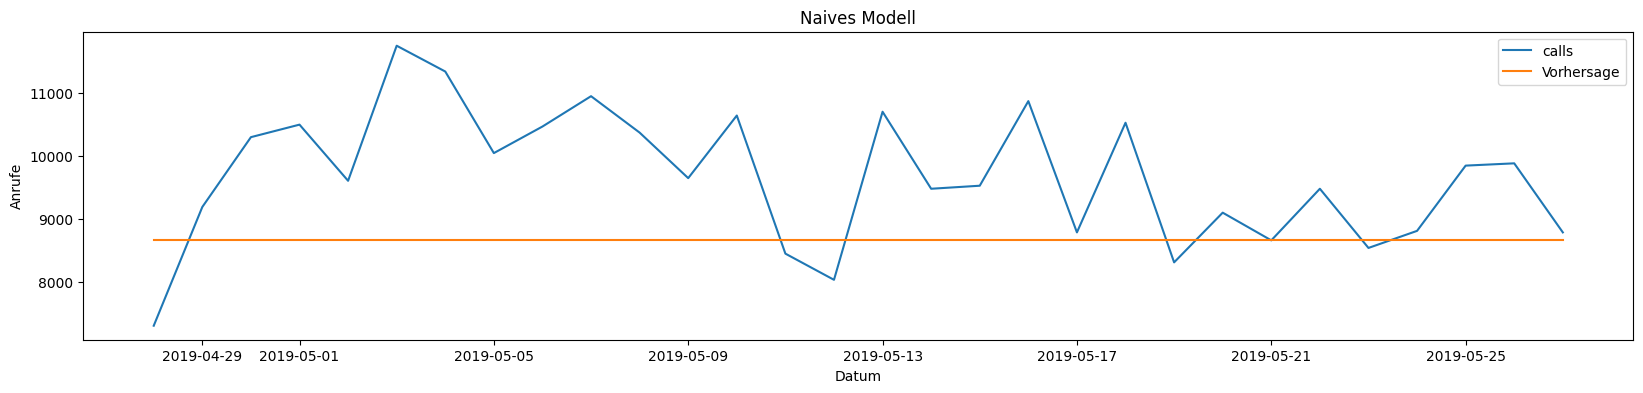

Mean Squared Error (MSE): 2052536.4
Mean Absolute Error (MAE): 1172.6
R-squared (R²): -0.926011251046784


In [4]:
# Plot:
# ==============================================================================
plt.figure(figsize=(20,4))
plt.plot(df['calls'].index[-periods:],df['calls'].iloc[-periods:], label = 'calls')
plt.plot(forecast_df['Vorhersage'], label = 'Vorhersage')
plt.legend()
plt.title('Naives Modell')
plt.xlabel('Datum')
plt.ylabel('Anrufe')
plt.show()

mse_test = mean_squared_error(df['calls'].iloc[-periods:], forecast)
mae_test = mean_absolute_error(df['calls'].iloc[-periods:], forecast)
r2_test = r2_score(df['calls'].iloc[-periods:], forecast)

print(f'Mean Squared Error (MSE): {mse_test}')
print(f'Mean Absolute Error (MAE): {mae_test}')
print(f'R-squared (R²): {r2_test}')

***Das Naive Modell hat einen MAE von 1173. ***

***Das Hauptmodell muss diesen Wert übertreffen. ***

### **Naives Modell für n_sick:**

In [5]:
# Download Data
# ==============================================================================
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df = df.asfreq('D')

In [6]:
# Naives Modell:
# ==============================================================================
end_train = '2019-04-27'
df_train = df.loc[:end_train]
df_train.info()

periods = 30
last_value = df_train['n_sick'].iloc[-1]
forecast_n_sick = [last_value] * periods
forecast_df_n_sick = pd.DataFrame(forecast_n_sick, columns=['Vorhersage'])
forecast_df_n_sick['date'] = pd.date_range(start=df_train['n_sick'].index[-1]+
                                    pd.DateOffset(days=1), periods=periods)

forecast_df_n_sick.set_index('date', inplace=True)
forecast_df_n_sick.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1122 entries, 2016-04-01 to 2019-04-27
Freq: D
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1122 non-null   int64  
 1   PRCP            1122 non-null   int64  
 2   SNWD            1122 non-null   int64  
 3   TMAX            1122 non-null   int64  
 4   TMIN            1122 non-null   int64  
 5   n_sick          1122 non-null   int64  
 6   calls           1122 non-null   int64  
 7   n_duty          1122 non-null   int64  
 8   sby_need        1122 non-null   int64  
 9   year            1122 non-null   int64  
 10  month           1122 non-null   int64  
 11  day             1122 non-null   int64  
 12  week            1122 non-null   int64  
 13  weekday         1122 non-null   int64  
 14  quarter         1122 non-null   int64  
 15  season          1122 non-null   int64  
 16  is_holiday      1122 non-null   int64  
 17  Einwohn

Vorhersage
date                  
2019-04-28          79
2019-04-29          79
2019-04-30          79
2019-05-01          79
2019-05-02          79

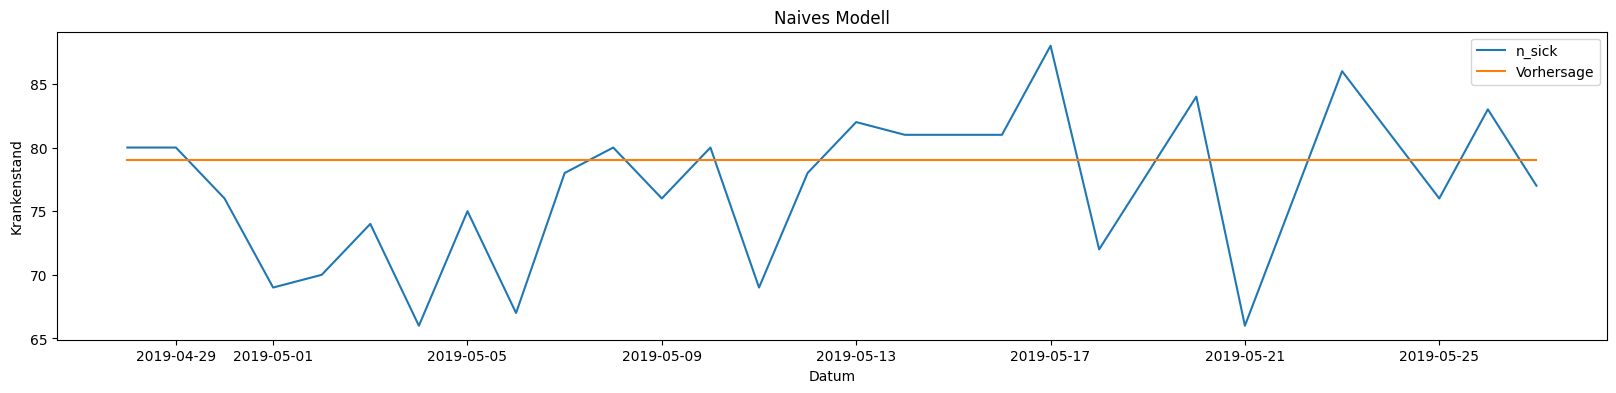

Mean Squared Error (MSE): 36.53333333333333
Mean Absolute Error (MAE): 4.666666666666667
R-squared (R²): -0.12295081967213117


In [7]:
# Plot:
# ==============================================================================
plt.figure(figsize=(20,4))
plt.plot(df['n_sick'].index[-periods:],df['n_sick'].iloc[-periods:], label = 'n_sick')
plt.plot(forecast_df_n_sick['Vorhersage'], label = 'Vorhersage')
plt.legend()
plt.title('Naives Modell')
plt.xlabel('Datum')
plt.ylabel('Krankenstand')
plt.show()

mse_test = mean_squared_error(df['n_sick'].iloc[-periods:], forecast_df_n_sick)
mae_test = mean_absolute_error(df['n_sick'].iloc[-periods:], forecast_df_n_sick)
r2_test = r2_score(df['n_sick'].iloc[-periods:], forecast_df_n_sick)

print(f'Mean Squared Error (MSE): {mse_test}')
print(f'Mean Absolute Error (MAE): {mae_test}')
print(f'R-squared (R²): {r2_test}')

# **2. Modeling_1.Cycle:**

Hier werden zuerst Modelle ausprobiert. Das bedeutet, diese werden nicht im vollem Umfang behandelt.

 Nach der Probephase wird im Cycle 2 ein ausgewähltes Modell tiefgründig optimiert.

# **2.1. SARIMAX Modeling**

In [8]:
# Libraries:
# ==============================================================================
!pip install prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.fft import fft
from matplotlib import mlab
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
from sklearn.model_selection import TimeSeriesSplit

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslo8rsv8/je6g8wrh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslo8rsv8/oh1o8pd0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59379', 'data', 'file=/tmp/tmpslo8rsv8/je6g8wrh.json', 'init=/tmp/tmpslo8rsv8/oh1o8pd0.json', 'output', 'file=/tmp/tmpslo8rsv8/prophet_modelwrxgn9tr/prophet_model-20241102111048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


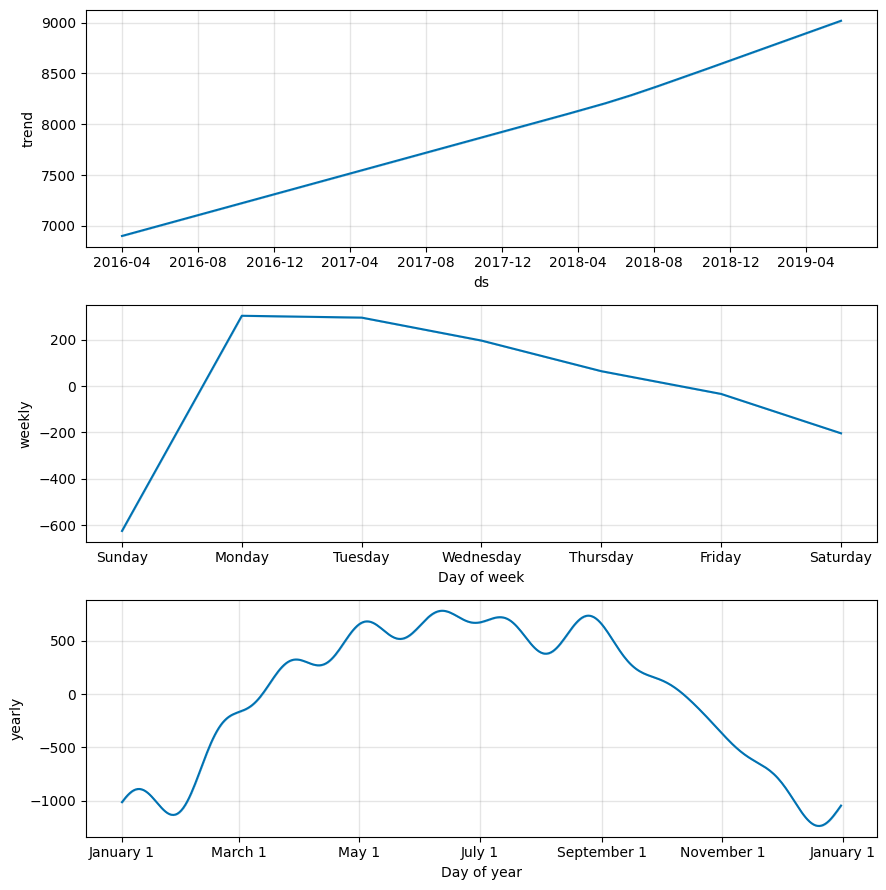

In [9]:
# Zerlegung der Zeitreihe:
# ==============================================================================

df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df = pd.DataFrame({'ds':df['date'], 'y':df['calls']})

model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)
model.plot_components(forecast)
plt.show()

- Es könnte eine Saisonalität bei 7 und 365 Tagen liegen.

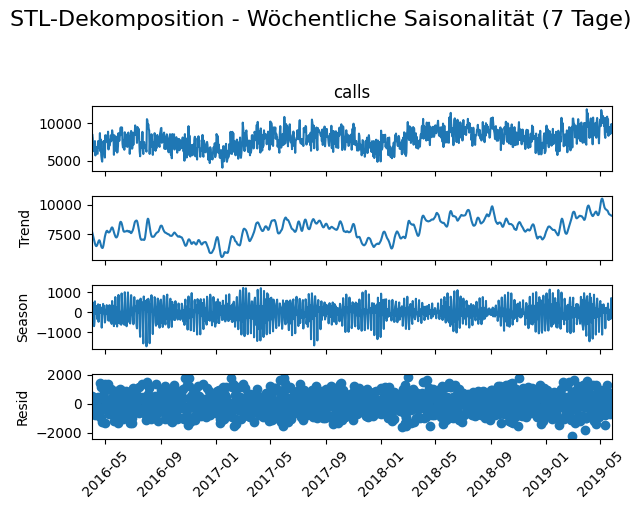

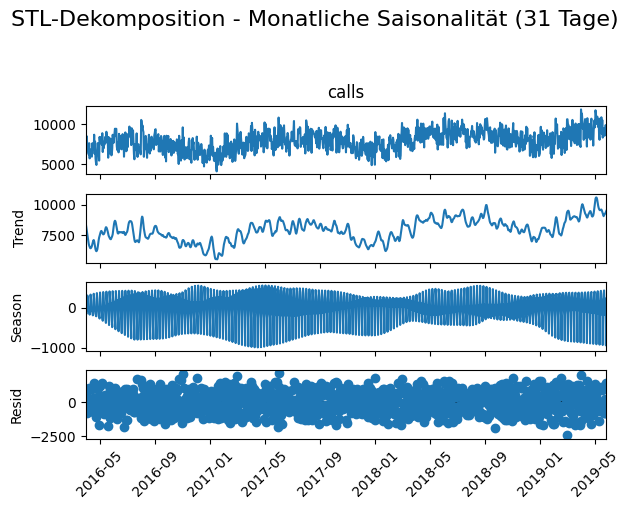

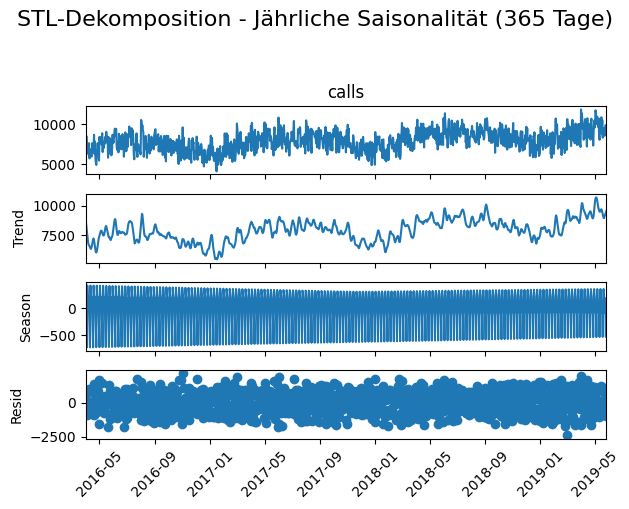

In [10]:
# Zerlegung mit STL :

df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.asfreq('D')

def plot_stl_with_rotated_x(stl_result, title):
    stl_result.plot()
    plt.suptitle(title, fontsize=16, y=1.05)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

stl = STL(df['calls'], seasonal=7)
result = stl.fit()
plot_stl_with_rotated_x(result, 'STL-Dekomposition - Wöchentliche Saisonalität (7 Tage)')
print('\n')

stl = STL(df['calls'], seasonal=31)
result = stl.fit()
plot_stl_with_rotated_x(result, 'STL-Dekomposition - Monatliche Saisonalität (31 Tage)')
print('\n')

stl = STL(df['calls'], seasonal=365)
result = stl.fit()
plot_stl_with_rotated_x(result, 'STL-Dekomposition - Jährliche Saisonalität (365 Tage)')
print('\n')

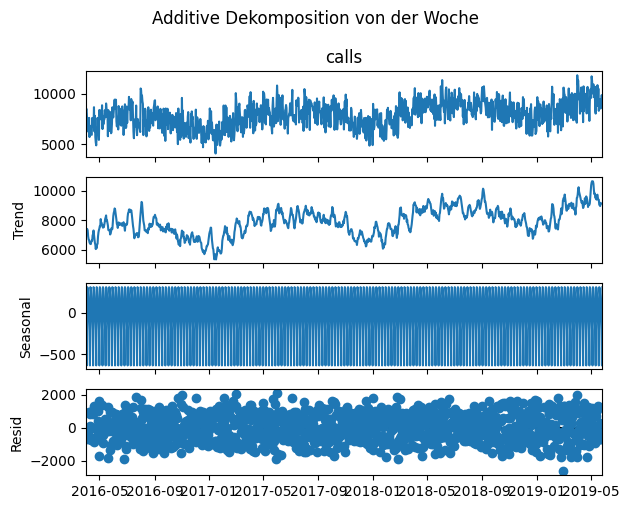

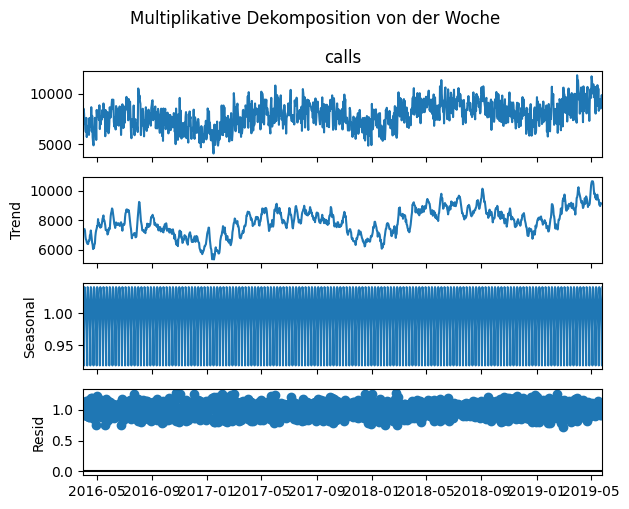

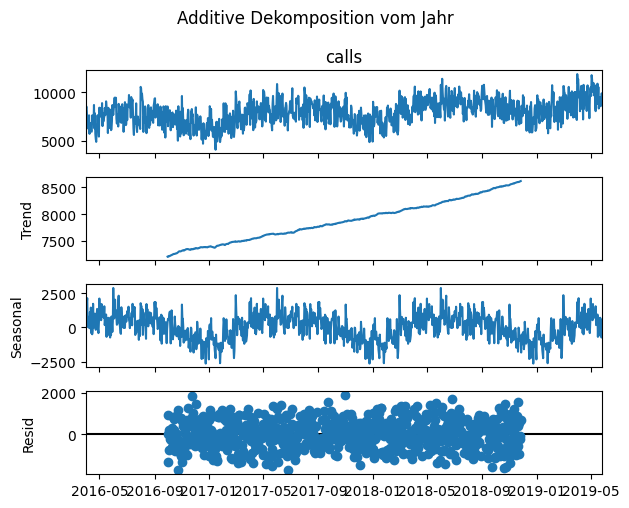

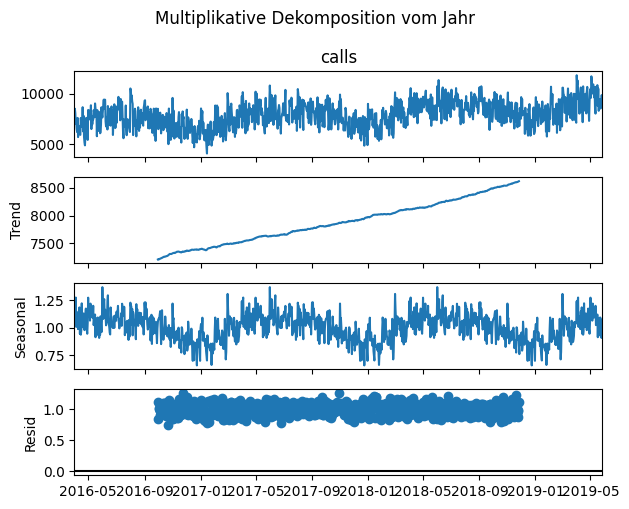

In [11]:
# Zerlegung mit klassischer additiver Dekomposition:

# Zeitreihe zerlegen
result_add = seasonal_decompose(df['calls'], model='additive', period=7)
result_mul = seasonal_decompose(df['calls'], model='multiplicative', period=7)
# Zeitreihe zerlegen
result_add365 = seasonal_decompose(df['calls'], model='additive', period=365)
result_mul365 = seasonal_decompose(df['calls'], model='multiplicative', period=365)

# Komponenten der additiven Dekomposition plotten
result_add.plot()
plt.suptitle('Additive Dekomposition von der Woche', y=1.05)
plt.show()

# Komponenten der multiplikativen Dekomposition plotten
result_mul.plot()
plt.suptitle('Multiplikative Dekomposition von der Woche', y=1.05)
plt.show()

# Komponenten der additiven Dekomposition plotten
result_add365.plot()
plt.suptitle('Additive Dekomposition vom Jahr', y=1.05)
plt.show()

# Komponenten der multiplikativen Dekomposition plotten
result_mul365.plot()
plt.suptitle('Multiplikative Dekomposition vom Jahr', y=1.05)
plt.show()


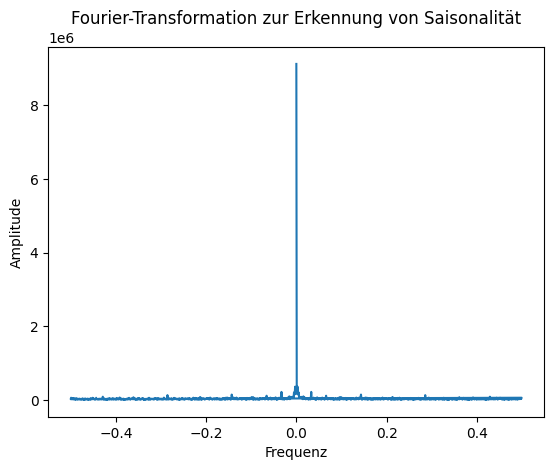

In [12]:
# Saisonalitätsanalyse mit FT:

fft_values = fft(df['calls'])
frequencies = np.fft.fftfreq(len(fft_values))

plt.plot(frequencies, np.abs(fft_values))
plt.title('Fourier-Transformation zur Erkennung von Saisonalität')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')
plt.show()

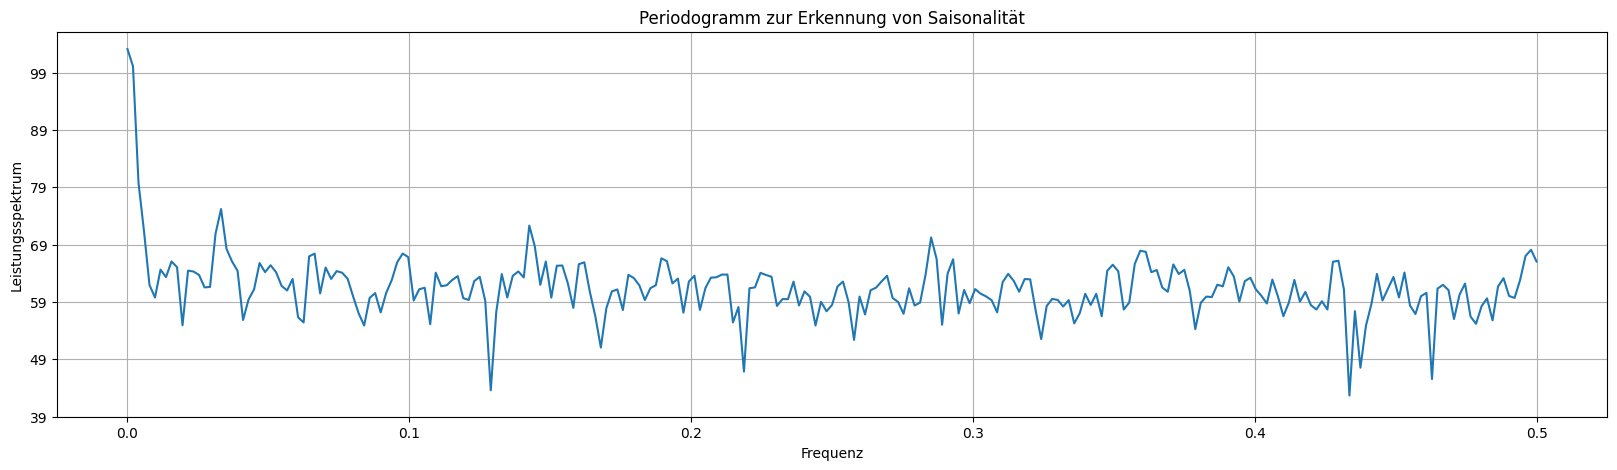

In [13]:
# Saisonalität mit Periodengramm:

plt.figure(figsize=(20, 5))
plt.psd(df['calls'], NFFT=512, Fs=1)
plt.title('Periodogramm zur Erkennung von Saisonalität')
plt.xlabel('Frequenz')
plt.ylabel('Leistungsspektrum')
plt.show()



Auswertung Periodengramm:


- 1 Jahr (365 Tage): ≈0.00274≈0.00274
- 1 Monat (30 Tage): ≈0.0333≈0.0333
- 1 Woche (7 Tage): ≈0.14286≈0.14286

**Fazit: Es werden die Saisonalitäten von 7 Tage und 365 Tage für die Zeitreihenanalyse verwendet.**

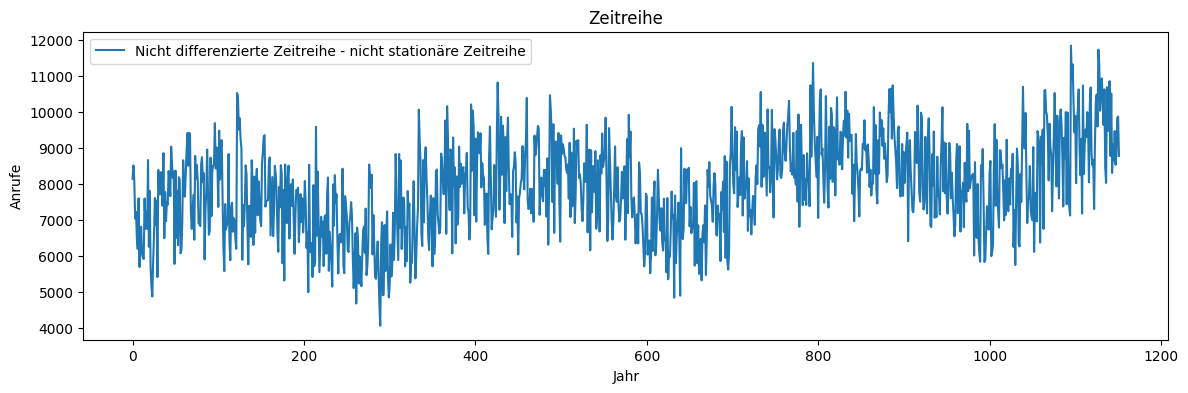

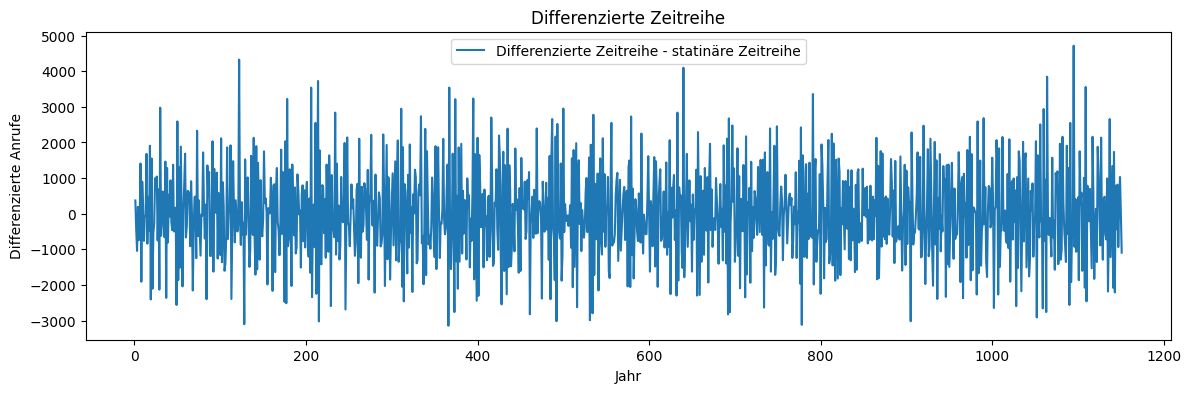

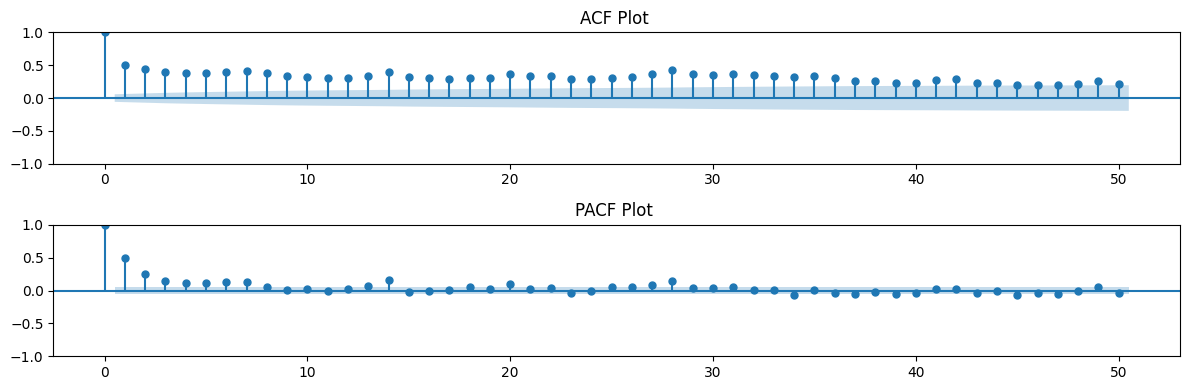

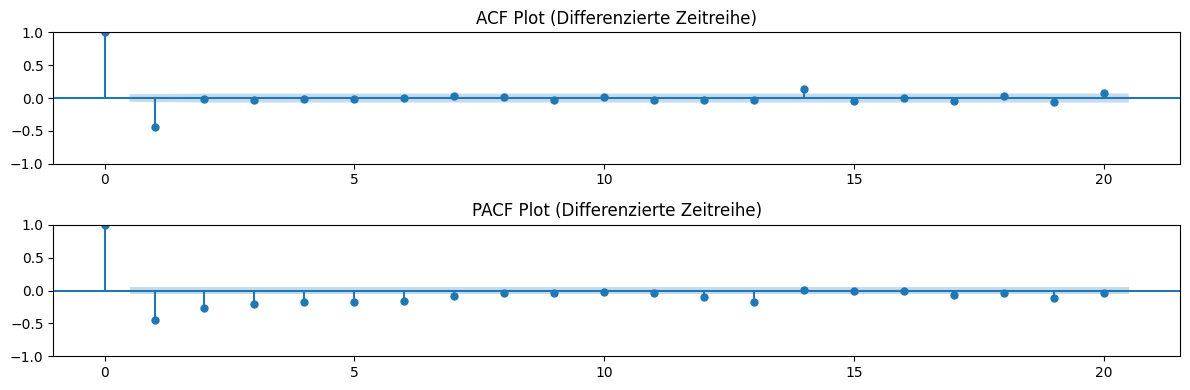

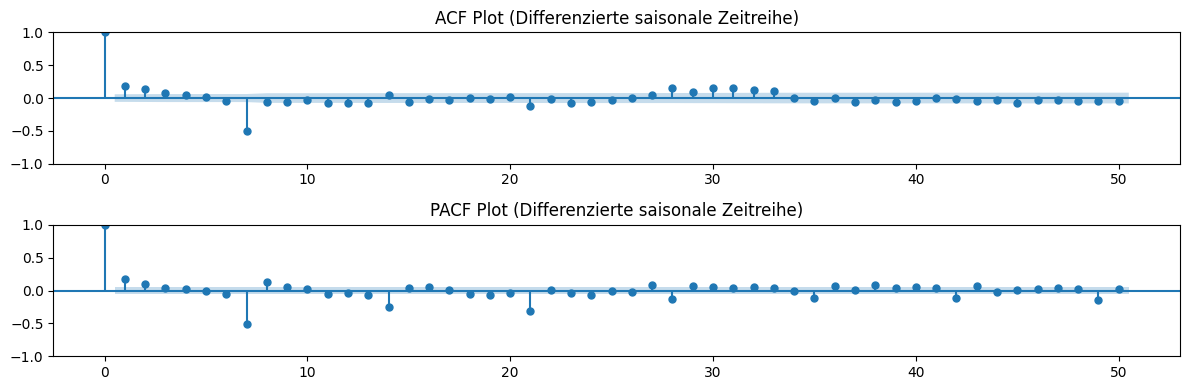

In [14]:
# ACF und PACF für die Modellparameter:
# Hier wurde die Saisonalität von 7 Tage gewählt für S.
# Die Saisonalität des Jahres wird dem Modell mit exogenen Variablen beigebracht.
# ==============================================================================


df = pd.read_excel('/content/sample_data/df_features.xlsx')  # Passe den Pfad zu deinen Daten an
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14,4))
plt.plot(df['calls'], label='Nicht differenzierte Zeitreihe - nicht stationäre Zeitreihe')
plt.xlabel('Jahr')
plt.ylabel('Anrufe')
plt.title('Zeitreihe')
plt.legend()
plt.show()
print('\n')

plt.figure(figsize=(14,4))
plt.plot((df['calls'].diff()), label = 'Differenzierte Zeitreihe - statinäre Zeitreihe')
plt.xlabel('Jahr')
plt.ylabel('Differenzierte Anrufe')
plt.title('Differenzierte Zeitreihe')
plt.legend()
plt.show()
print('\n')

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plot_acf(df['calls'], lags=50, ax=plt.gca())
plt.title('ACF Plot ')
plt.subplot(2, 1, 2)
plot_pacf(df['calls'], lags=50, ax=plt.gca())
plt.title('PACF Plot ')
plt.tight_layout()
plt.show()
print('\n')

time_series_diff = df['calls'].diff().dropna()
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plot_acf(time_series_diff, lags=20, ax=plt.gca())
plt.title('ACF Plot (Differenzierte Zeitreihe)')
plt.subplot(2, 1, 2)
plot_pacf(time_series_diff, lags=20, ax=plt.gca())
plt.title('PACF Plot (Differenzierte Zeitreihe)')
plt.tight_layout()
plt.show()
print('\n')

time_series_diff = df['calls'].diff(7).dropna()
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plot_acf(time_series_diff, lags=50, ax=plt.gca())
plt.title('ACF Plot (Differenzierte saisonale Zeitreihe)')
plt.subplot(2, 1, 2)
plot_pacf(time_series_diff, lags=50, ax=plt.gca())
plt.title('PACF Plot (Differenzierte saisonale Zeitreihe)')
plt.tight_layout()
plt.show()

Fazit:
- p = 0
- d = 1
- q = 1
- P = 0
- D = 1
- Q = 1
- S = 7

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      1152 non-null   int64         
 1   date            1152 non-null   datetime64[ns]
 2   PRCP            1152 non-null   int64         
 3   SNWD            1152 non-null   int64         
 4   TMAX            1152 non-null   int64         
 5   TMIN            1152 non-null   int64         
 6   n_sick          1152 non-null   int64         
 7   calls           1152 non-null   int64         
 8   n_duty          1152 non-null   int64         
 9   sby_need        1152 non-null   int64         
 10  year            1152 non-null   int64         
 11  month           1152 non-null   int64         
 12  day             1152 non-null   int64         
 13  week            1152 non-null   int64         
 14  weekday         1152 non-null   int64         
 15  quar

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (Traingsdaten):777.0786257938795
Mean Absolute Error: 813.6381104264975
Mean Squared Error: 873277.0099719497
R²-Wert: 0.47933871586923726


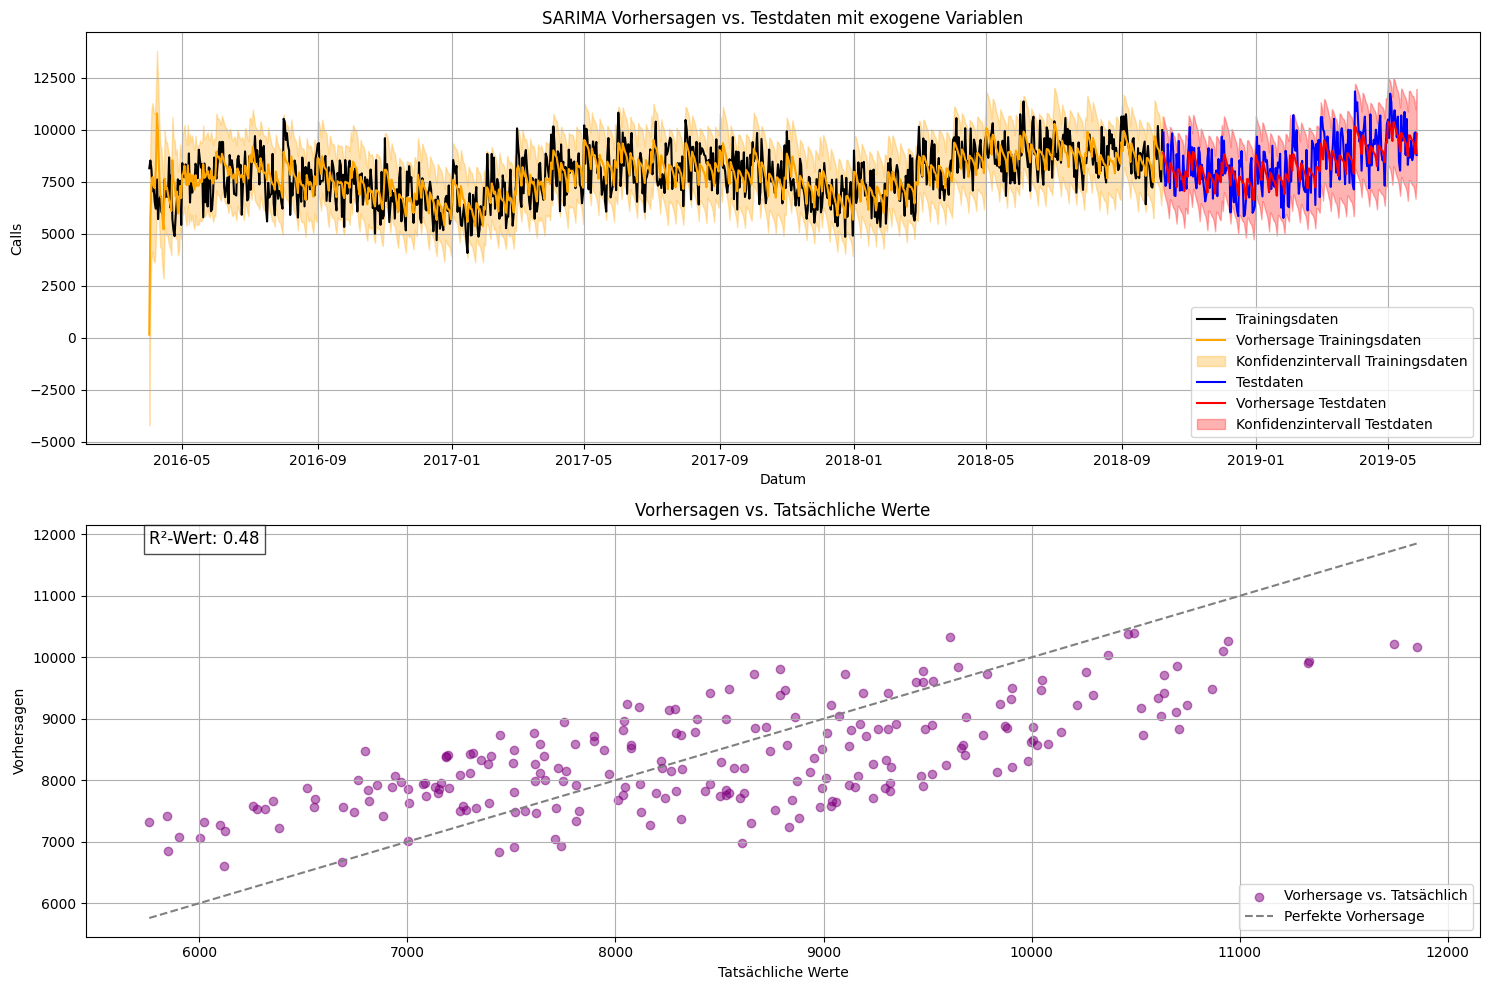

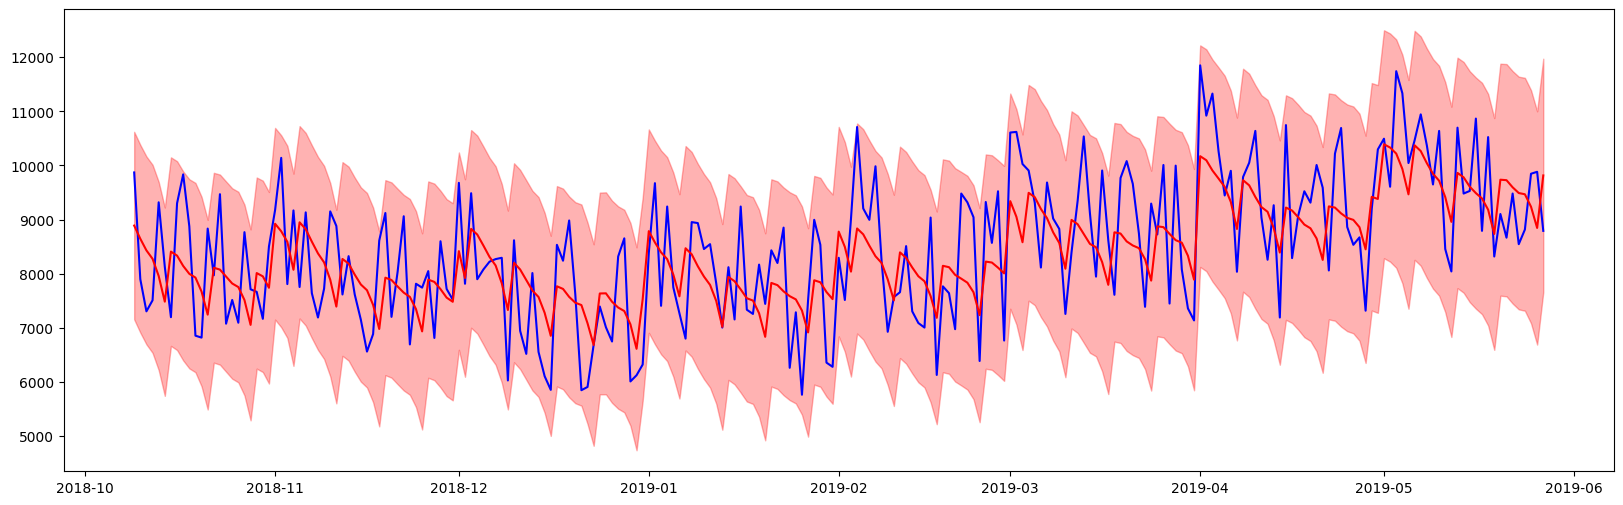

In [16]:
# Erstellung des SARIMAX-Modells:
# ==============================================================================

df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


exog = pd.DataFrame(index=df.index)


exog['cos_year'] = df['cos_year']
exog['sin_week'] = df['sin_week']
exog['cos_week'] = df['cos_week']
exog['cos_month'] = df['cos_month']
exog['day'] = df['day']
exog['month'] = df['month']
exog['season'] = df['season']
exog['is_holiday'] = df['is_holiday']
exog['lag_365'] = df['lag_365']

train_size = int(len(df) * 0.80)
train, test = df['calls'][:train_size], df['calls'][train_size:]
exog_train, exog_test = exog[:train_size], exog[train_size:]

model = SARIMAX(
    train,
    order=(0, 1, 1),
    seasonal_order=(0, 1, 1, 7),
    exog=exog_train,
)
model_fit = model.fit(disp=False)

train_forecast = model_fit.get_prediction(start=pd.to_datetime(train.index[0]), end=pd.to_datetime(train.index[-1]), exog=exog_train)
train_forecast_mean = train_forecast.predicted_mean
train_conf_int = train_forecast.conf_int()

test_forecast = model_fit.get_forecast(steps=len(test), exog=exog_test)
test_forecast_mean = test_forecast.predicted_mean
test_conf_int = test_forecast.conf_int()

mae_train = mean_absolute_error(train, train_forecast_mean)
print(f'Mean Absolute Error (Traingsdaten):{mae_train}')
mae = mean_absolute_error(test, test_forecast_mean)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(test, test_forecast_mean)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(test, test_forecast_mean)
print(f'R²-Wert: {r2}')

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(train.index, train, label='Trainingsdaten', color='black')
plt.plot(train.index, train_forecast_mean, label='Vorhersage Trainingsdaten', color='orange')
plt.fill_between(train.index, train_conf_int.iloc[:, 0], train_conf_int.iloc[:, 1], color='orange', alpha=0.3, label='Konfidenzintervall Trainingsdaten')
plt.plot(test.index, test, label='Testdaten', color='blue')
plt.plot(test.index, test_forecast_mean, label='Vorhersage Testdaten', color='red')
plt.fill_between(test.index, test_conf_int.iloc[:, 0], test_conf_int.iloc[:, 1], color='red', alpha=0.3, label='Konfidenzintervall Testdaten')
plt.title('SARIMA Vorhersagen vs. Testdaten mit exogene Variablen')
plt.xlabel('Datum')
plt.ylabel('Calls')
plt.legend(loc='lower right')  # Position der Legende anpassen
plt.grid(True)

plt.subplot(2, 1, 2)
plt.scatter(test, test_forecast_mean, alpha=0.5, color='purple', label='Vorhersage vs. Tatsächlich')
plt.plot([test.min(), test.max()], [test.min(), test.max()], color='gray', linestyle='--', label='Perfekte Vorhersage')
plt.text(x=test.min(), y=test.max() - 10, s=f'R²-Wert: {r2:.2f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7))
plt.legend(loc='lower right')
plt.title('Vorhersagen vs. Tatsächliche Werte')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagen')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,6))
plt.plot(test.index, test, label='Testdaten', color='blue')
plt.plot(test.index, test_forecast_mean, label='Vorhersage Testdaten', color='red')
plt.fill_between(test.index, test_conf_int.iloc[:, 0], test_conf_int.iloc[:, 1], color='red', alpha=0.3, label='Konfidenzintervall Testdaten')
plt.show()


# **2.2. Prophet Modeling**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslo8rsv8/vfpl9rgg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslo8rsv8/xky0q7_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42779', 'data', 'file=/tmp/tmpslo8rsv8/vfpl9rgg.json', 'init=/tmp/tmpslo8rsv8/xky0q7_f.json', 'output', 'file=/tmp/tmpslo8rsv8/prophet_modeloipriw6o/prophet_model-20241102111216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


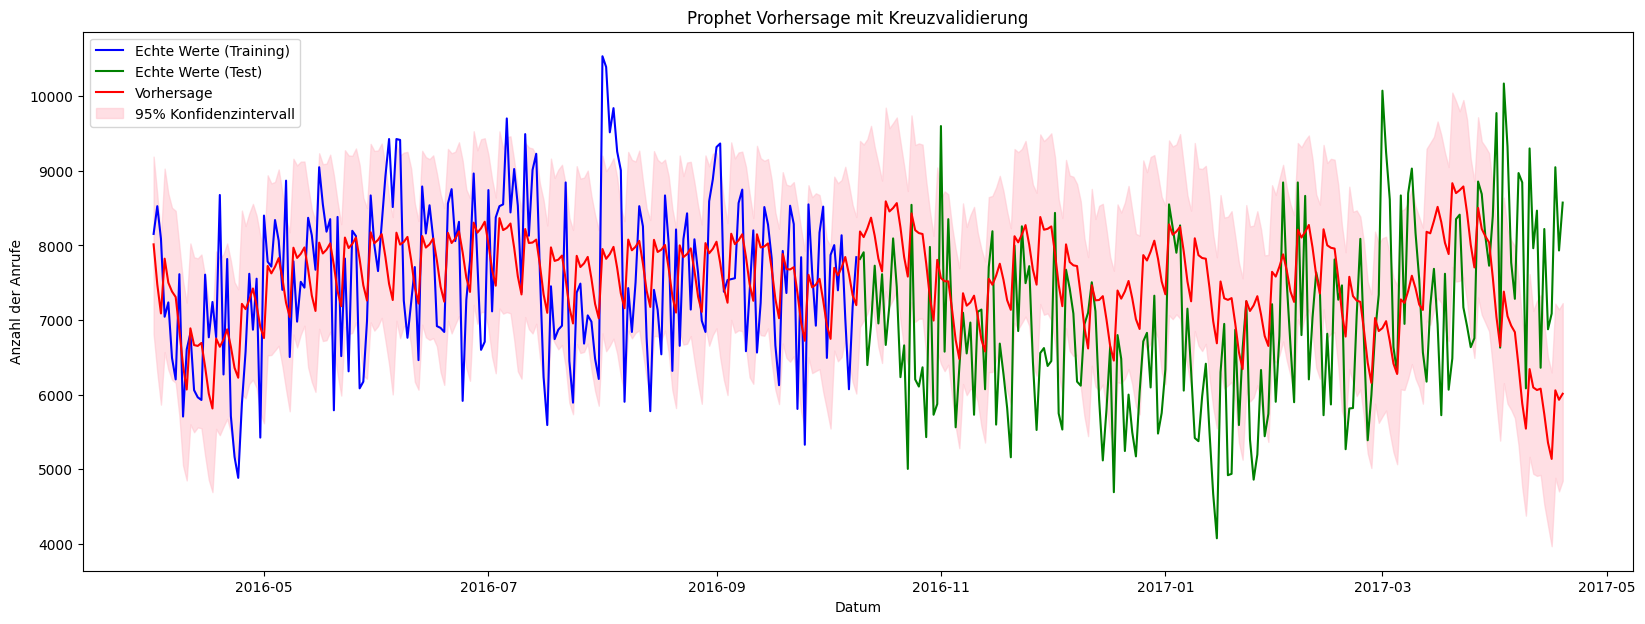

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslo8rsv8/stdaxl7w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslo8rsv8/u3zthhmx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95647', 'data', 'file=/tmp/tmpslo8rsv8/stdaxl7w.json', 'init=/tmp/tmpslo8rsv8/u3zthhmx.json', 'output', 'file=/tmp/tmpslo8rsv8/prophet_modelnleb7wto/prophet_model-20241102111217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


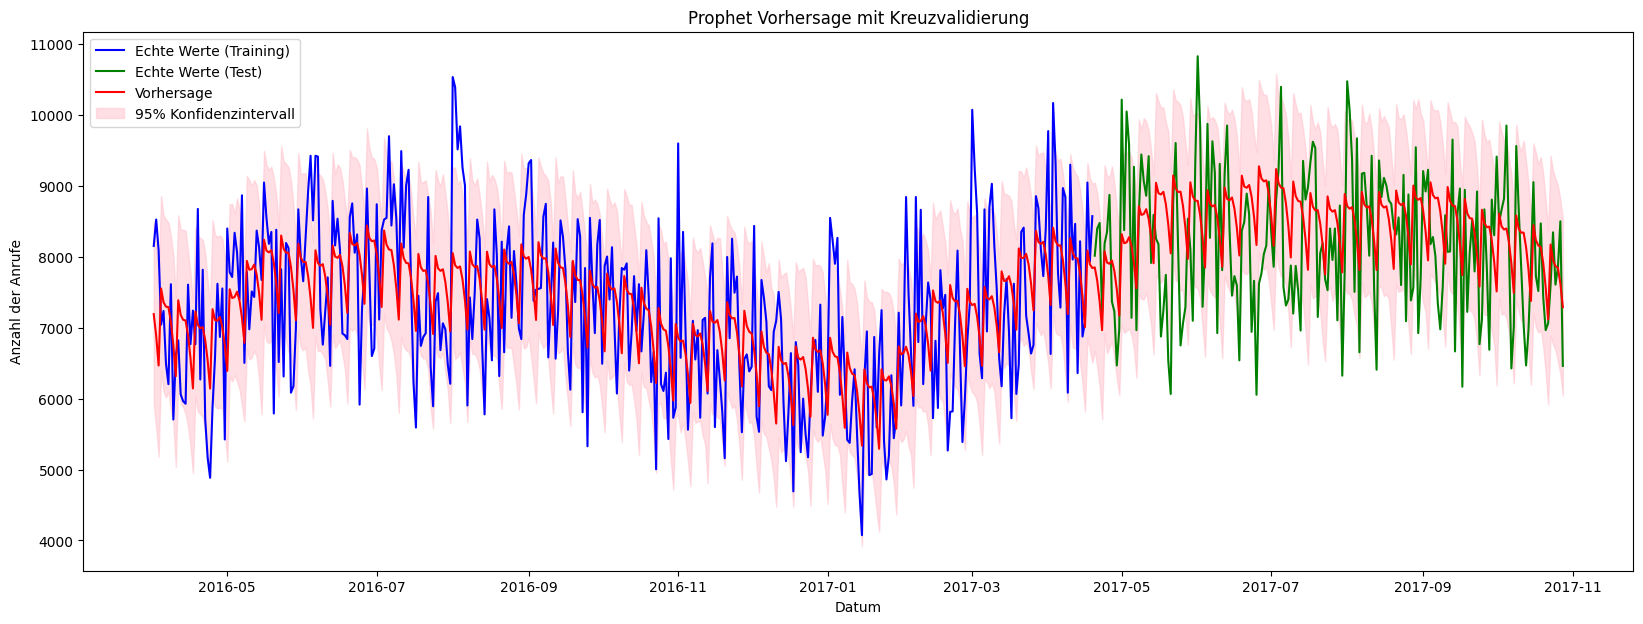

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslo8rsv8/pkwlvckd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslo8rsv8/u6z_reef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79264', 'data', 'file=/tmp/tmpslo8rsv8/pkwlvckd.json', 'init=/tmp/tmpslo8rsv8/u6z_reef.json', 'output', 'file=/tmp/tmpslo8rsv8/prophet_modelk12gkb2w/prophet_model-20241102111219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


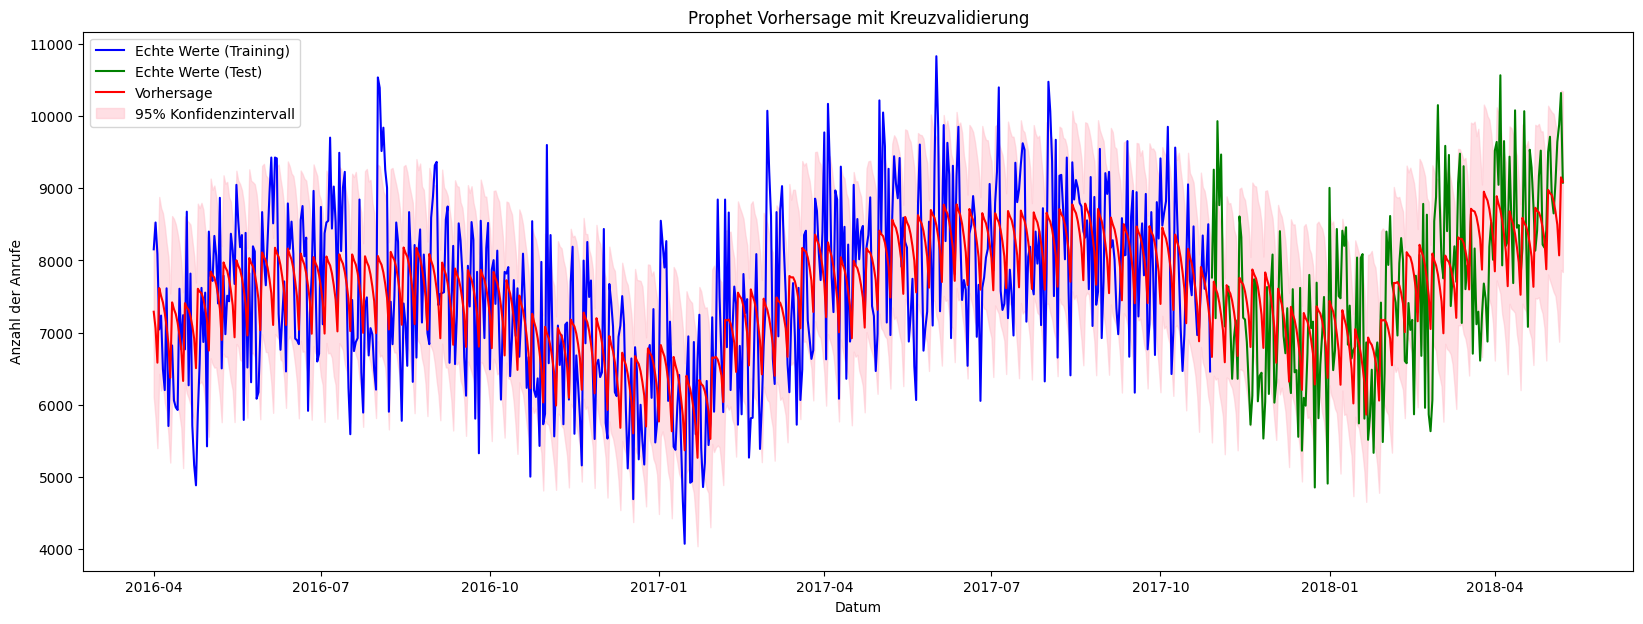

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslo8rsv8/nsxisz8x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslo8rsv8/n808d9c2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61501', 'data', 'file=/tmp/tmpslo8rsv8/nsxisz8x.json', 'init=/tmp/tmpslo8rsv8/n808d9c2.json', 'output', 'file=/tmp/tmpslo8rsv8/prophet_modelpu6ma500/prophet_model-20241102111220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


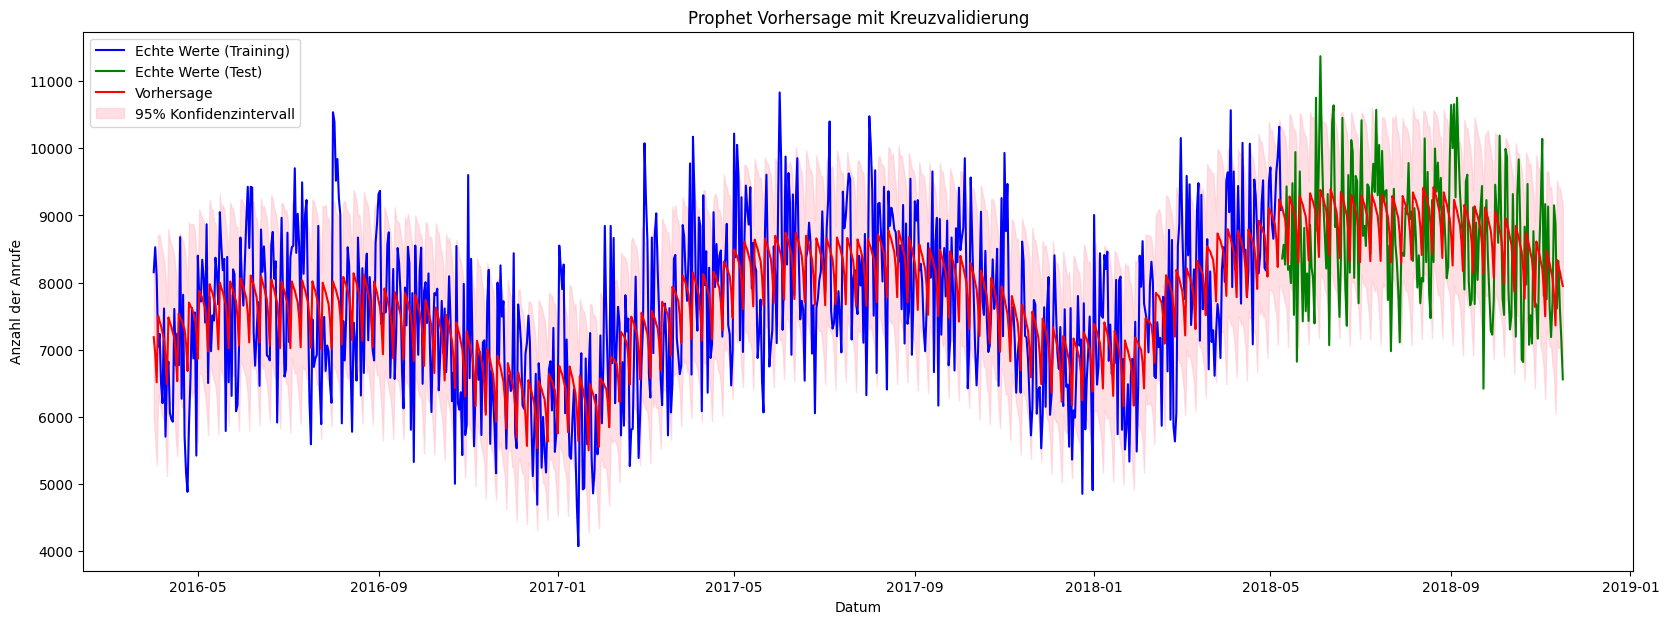

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslo8rsv8/prk0w5vc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslo8rsv8/hce1xvue.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43614', 'data', 'file=/tmp/tmpslo8rsv8/prk0w5vc.json', 'init=/tmp/tmpslo8rsv8/hce1xvue.json', 'output', 'file=/tmp/tmpslo8rsv8/prophet_modelwn8jh1wn/prophet_model-20241102111221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


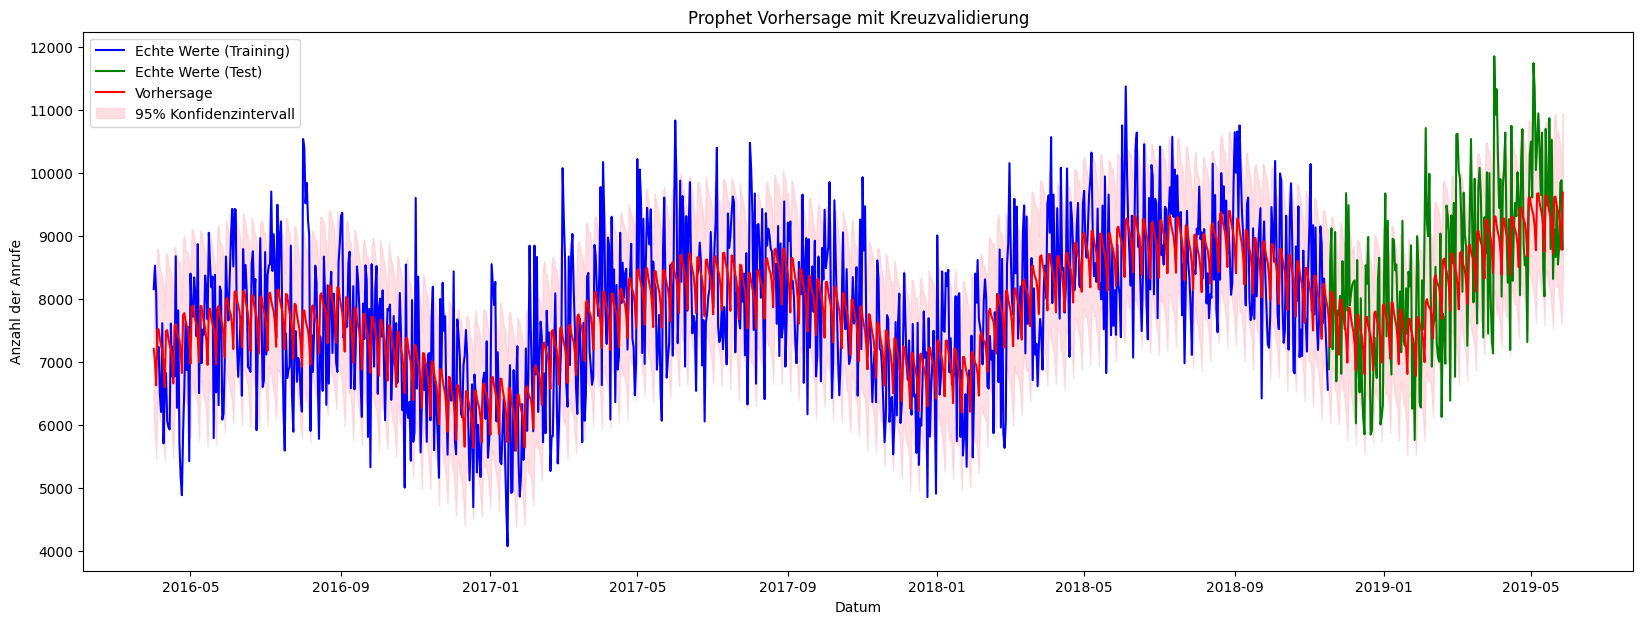

Durchschnittlicher MAE für Trainingsdaten über alle Folds: 788.1044352443362
Durchschnittlicher MAE für Testdaten über alle Folds: 908.3373436720078


In [17]:
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])

# Die Spalten müssen wie folgt umbenannt werden:
df = df.rename(columns={'date': 'ds', 'calls': 'y'})

tscv = TimeSeriesSplit(n_splits=5)
mae_train_scores = []
mae_test_scores = []

for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]

    model = Prophet(
        weekly_seasonality=True,
        yearly_seasonality=True,
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=0.05
    )

    model.fit(train[['ds', 'y']])

    future = model.make_future_dataframe(periods=len(test))
    forecast = model.predict(future)

    train_mae = mean_absolute_error(train['y'], forecast['yhat'][:len(train)])
    mae_train_scores.append(train_mae)
    test_mae = mean_absolute_error(test['y'], forecast['yhat'][len(train):])
    mae_test_scores.append(test_mae)

    plt.figure(figsize=(20, 7))
    plt.plot(train['ds'], train['y'], label='Echte Werte (Training)', color='blue')
    plt.plot(test['ds'], test['y'], label='Echte Werte (Test)', color='green')
    plt.plot(forecast['ds'], forecast['yhat'], label='Vorhersage', color='red')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'],
                     forecast['yhat_upper'], color='pink', alpha=0.5,
                     label='95% Konfidenzintervall')
    plt.title('Prophet Vorhersage mit Kreuzvalidierung')
    plt.xlabel('Datum')
    plt.ylabel('Anzahl der Anrufe')
    plt.legend()
    plt.show()

average_train_mae = sum(mae_train_scores) / len(mae_train_scores)
average_test_mae = sum(mae_test_scores) / len(mae_test_scores)

print(f'Durchschnittlicher MAE für Trainingsdaten über alle Folds: {average_train_mae}')
print(f'Durchschnittlicher MAE für Testdaten über alle Folds: {average_test_mae}')

# **2.3. LSTM  Modeling**

In [18]:
# Libraries
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [19]:
# Download Data
# ==============================================================================
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df = df.asfreq('D')


df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1152 entries, 2016-04-01 to 2019-05-27
Freq: D
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1152 non-null   int64  
 1   PRCP            1152 non-null   int64  
 2   SNWD            1152 non-null   int64  
 3   TMAX            1152 non-null   int64  
 4   TMIN            1152 non-null   int64  
 5   n_sick          1152 non-null   int64  
 6   calls           1152 non-null   int64  
 7   n_duty          1152 non-null   int64  
 8   sby_need        1152 non-null   int64  
 9   year            1152 non-null   int64  
 10  month           1152 non-null   int64  
 11  day             1152 non-null   int64  
 12  week            1152 non-null   int64  
 13  weekday         1152 non-null   int64  
 14  quarter         1152 non-null   int64  
 15  season          1152 non-null   int64  
 16  is_holiday      1152 non-null   int64  
 17  Einwohn

Datentyp: <class 'numpy.ndarray'>
Shape von <class 'numpy.ndarray'>: (1152, 2)
[[8154 8154]
 [8526 8154]
 [8088 8154]
 ...
 [9846 7572]
 [9882 8136]
 [8790 7428]]
Datentyp: <class 'numpy.ndarray'>
Shape von <class 'numpy.ndarray'>: (1152, 2)
[[0.52469136 0.60390764]
 [0.57253086 0.60390764]
 [0.5162037  0.60390764]
 ...
 [0.74228395 0.51776199]
 [0.74691358 0.60124334]
 [0.60648148 0.4964476 ]]
Shape von X: (1141, 10, 2)
Shape von y: (1141,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0952 - val_loss: 0.0455
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0237 - val_loss: 0.0250
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0214 - val_loss: 0.0202
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0203 - val_loss: 0.0179
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0194 - val_loss: 0.0149
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0211 - val_loss: 0.0189
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0194 - val_loss: 0.0145
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0196 - val_loss: 0.0209
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0202 - val_loss: 0.0176
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0203 - val_loss: 0.0195
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0193 - val_loss: 0.0144
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step

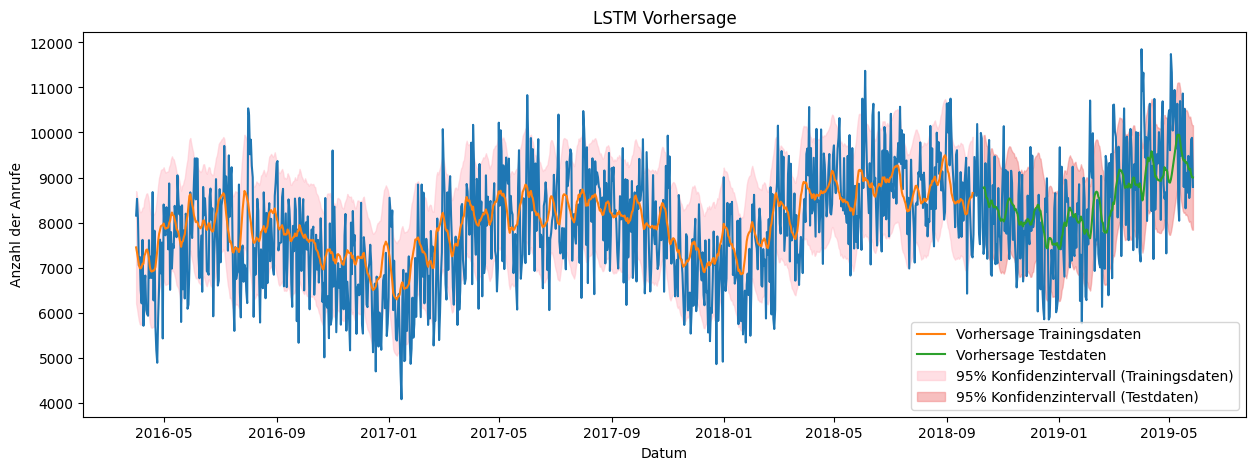

Mean Absolute Error for test data (MAE): 959.2616636784314
Mean Absolute Error for training data (MAE): 835.873524828961


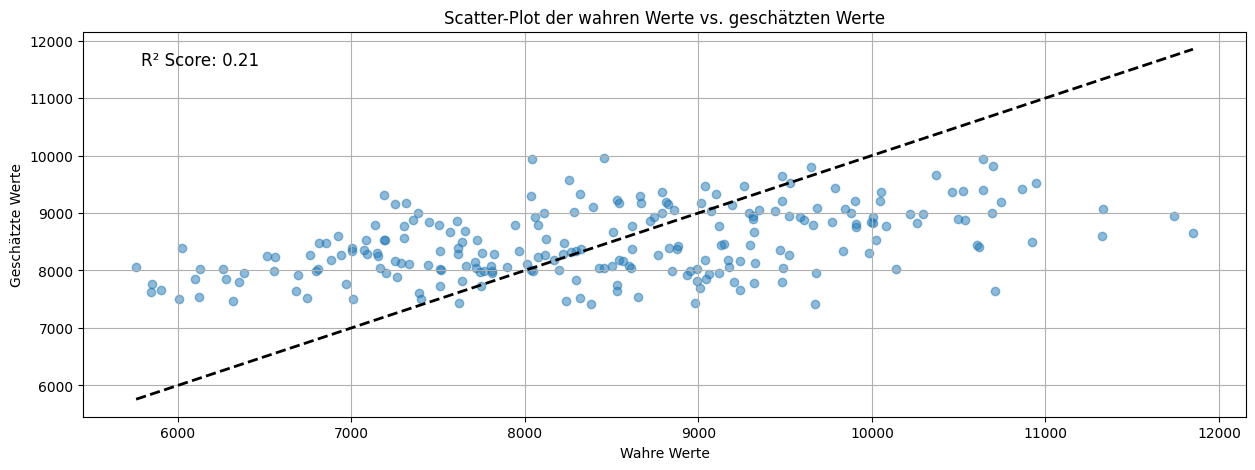

In [20]:
# LSTM-Modell erstellen
# ==============================================================================

# 0. Array erstellen

data = df[['calls', 'lag_365']].values
print(f'Datentyp: {type(data)}')
print(f'Shape von {type(data)}: {data.shape}')
print(data)

# 1.Daten normalisieren
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
print(f'Datentyp: {type(scaled_data)}')
print(f'Shape von {type(scaled_data)}: {scaled_data.shape}')
print(scaled_data)

# 2. Funktion zur Ersetellung der Sequenzen für das LSTM
# Erstellt den benötigten 3D-Array: (samples, time_steps, features).
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])  # Alle Features
        y.append(data[i + time_step, 0])  # Nur die Zielvariable (calls)
    return np.array(X), np.array(y)

# Parameter
time_step = 10
X, y = create_dataset(scaled_data, time_step)
print(f'Shape von X: {X.shape}')
print(f'Shape von y: {y.shape}')

# 3. Train/Test-Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 4. LSTM-Modell erstellen
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X.shape[2])))
model.add(Dropout(0.1)) #Dropout 1 nach dem 1. LSTM Layer (gegen Overfitting)
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.1)) # Dropout 2 nach dem 2. LSTM Layer (gegen Overfitting)
model.add(Dense(1))

# Modell kompilieren
model.compile(optimizer='adam', loss='mean_squared_error')


# 5. Modell trainieren
model.fit(X_train, y_train, epochs = 100, batch_size = 32,
          validation_split = 0.2, callbacks = EarlyStopping(monitor='val_loss',
          patience=20, restore_best_weights=True))


# 7.Vorhersage

y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate((y_pred,
                                                  np.zeros((y_pred.shape[0],
                                                  data.shape[1] - 1))),
                                                  axis=1))[:, 0]
confidence_interval = 1.96 * np.std(y_pred)
y_pred_upper = y_pred + confidence_interval
y_pred_lower = y_pred - confidence_interval

train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(np.concatenate((train_predict,
                                        np.zeros((train_predict.shape[0],
                                        data.shape[1] - 1))), axis=1))[:, 0]
train_confidence_interval = 1.96 * np.std(train_predict)
train_pred_upper = train_predict + train_confidence_interval
train_pred_lower = train_predict - train_confidence_interval

# 8. Plotten und Metriken


plt.figure(figsize=(15,5))
plt.plot(df['calls'])
plt.plot(df.index[:len(y_train)], train_predict, label = 'Vorhersage Trainingsdaten')
plt.plot(df.index[len(y_train)+11:], y_pred, label = 'Vorhersage Testdaten')
plt.fill_between(df.index[:len(y_train)], train_pred_lower, train_pred_upper,
                 color='pink', alpha=0.5,
                 label='95% Konfidenzintervall (Trainingsdaten)')
plt.fill_between(df.index[-len(y_test):], y_pred_lower, y_pred_upper,
                 color='lightcoral', alpha=0.5,
                 label='95% Konfidenzintervall (Testdaten)')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Anrufe')
plt.title('LSTM Vorhersage')
plt.legend()
plt.show()

# Mean Absolute Error
mae = mean_absolute_error(df['calls'].values[-len(y_test):], y_pred)
print(f'Mean Absolute Error for test data (MAE): {mae}')
mae_train = mean_absolute_error(df['calls'].values[:len(train_predict)],
                                train_predict)
print(f'Mean Absolute Error for training data (MAE): {mae_train}')

plt.figure(figsize=(15, 5))
plt.scatter(df['calls'].values[-len(y_test):], y_pred, alpha=0.5)
plt.plot([df['calls'].values[-len(y_test):].min(),
          df['calls'].values[-len(y_test):].max()],
         [df['calls'].values[-len(y_test):].min(),
          df['calls'].values[-len(y_test):].max()],
         'k--', lw=2)  # Diagonale Linie
plt.xlabel('Wahre Werte')
plt.ylabel('Geschätzte Werte')
plt.title('Scatter-Plot der wahren Werte vs. geschätzten Werte')
plt.grid()
r2 = r2_score(df['calls'].values[-len(y_test):], y_pred)
plt.text(0.05, 0.95, f'R² Score: {r2:.2f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()


# **2.4. Exponential Smoothing**

In [21]:
# Libraries
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [22]:
# Download Data
# ==============================================================================
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df = df.asfreq('D')

In [23]:
# Modell erstellen
# ==============================================================================
train_size = int(len(df) *0.8)
train, test = df['calls'][:train_size], df['calls'][train_size:]

model = ExponentialSmoothing(train, trend = 'add', seasonal = 'add', seasonal_periods = 365)
model_fit = model.fit(
    smoothing_level=0.001,         # Alpha: Glättung der Level-Komponente, kleiner Wert, um nicht zu stark auf kurzfristige Änderungen zu reagieren
    smoothing_slope=0.001,         # Beta: Glättung der Trend-Komponente
    smoothing_seasonal=0.001,      # Gamma: Glättung der Saisonalitätskomponente
    optimized=False            # Manuelles Setzen der Parameter, keine automatische Optimierung
)

forecast = model_fit.forecast(steps = len(test))
train_forecast = model_fit.fittedvalues

<ipython-input-23-29fb7389eb78>:7: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(


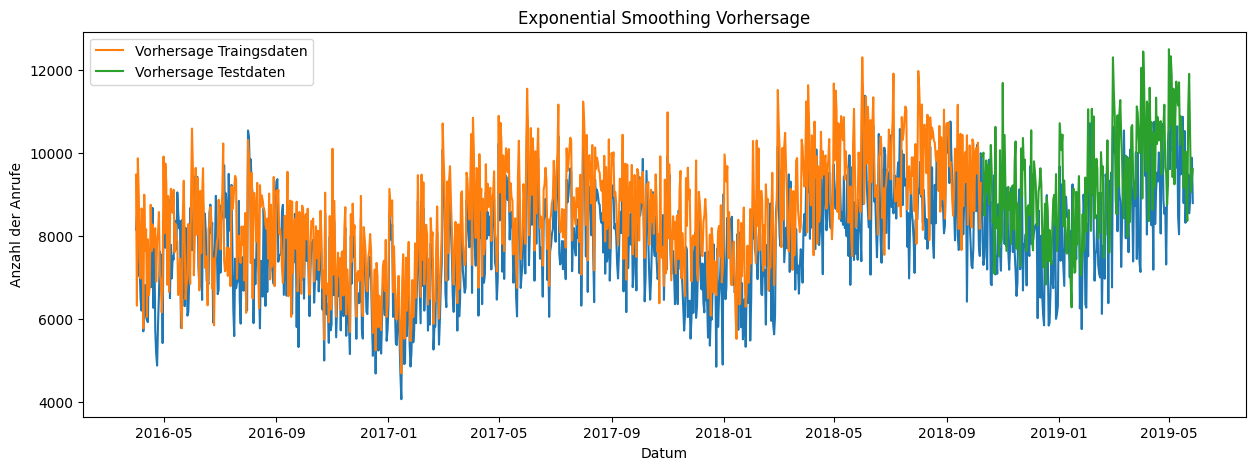

Mean Absolute Error for test data (MAE): 1347.7145057481482
Mean Absolute Error for training data (MAE): 997.2099307057214


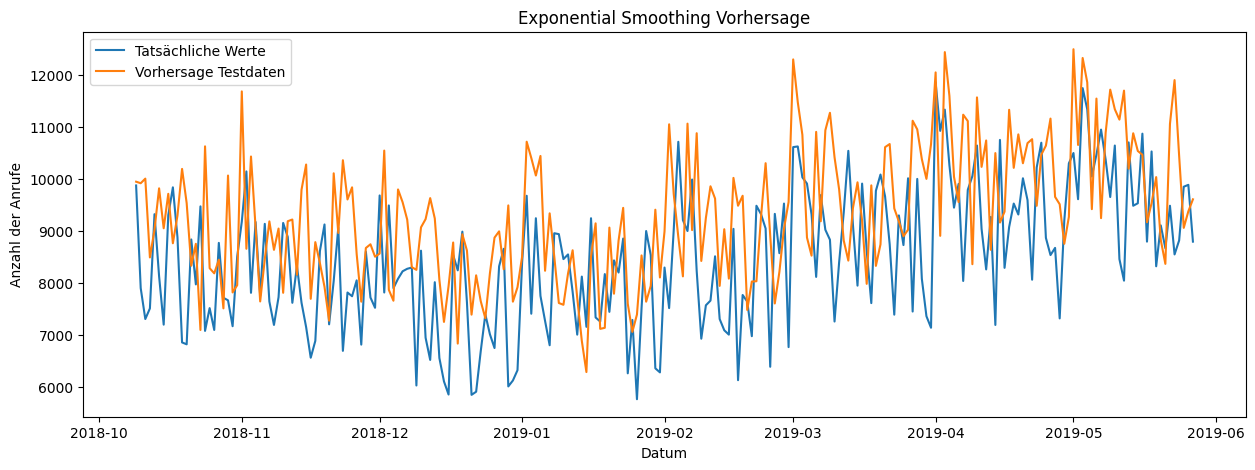

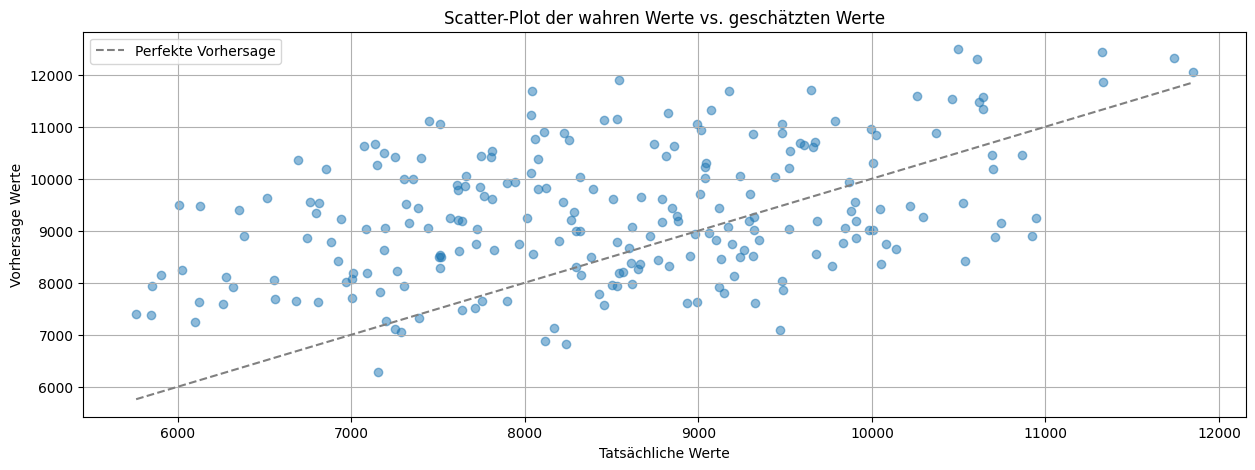

R² Score: -0.582044480020196


In [24]:
# Plot
# ==============================================================================
plt.figure(figsize=(15,5))
plt.plot(df['calls'])
plt.plot(df.index[:train_size], train_forecast, label = 'Vorhersage Traingsdaten')
plt.plot(df.index[-len(test):], forecast, label = 'Vorhersage Testdaten')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Anrufe')
plt.title('Exponential Smoothing Vorhersage')
plt.legend()
plt.show()

# Mean Absolute Error
mae = mean_absolute_error(test, forecast)
print(f'Mean Absolute Error for test data (MAE): {mae}')
mae_train = mean_absolute_error(train, train_forecast)
print(f'Mean Absolute Error for training data (MAE): {mae_train}')

plt.figure(figsize=(15,5))
plt.plot(df.index[-len(test):], df['calls'].values[-len(test):], label = 'Tatsächliche Werte')
plt.plot(df.index[-len(test):], forecast, label = 'Vorhersage Testdaten')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Anrufe')
plt.title('Exponential Smoothing Vorhersage')
plt.legend()
plt.show()

# Scatterplot
plt.figure(figsize=(15,5))
plt.scatter(df['calls'].values[-len(test):], forecast, alpha=0.5)
plt.plot([test.min(), test.max()], [test.min(), test.max()], color='gray',
         linestyle='--', label='Perfekte Vorhersage')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersage Werte')
plt.title('Scatter-Plot der wahren Werte vs. geschätzten Werte')
plt.grid()
plt.legend()
plt.show()

r2 = r2_score(test, forecast)
print(f'R² Score: {r2}')



# **2.5. XGBoost**

In [25]:
# Libraries
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from statsmodels.tsa.filters.hp_filter import hpfilter
from sklearn.linear_model import LinearRegression


In [26]:
# Data Download
# ==============================================================================
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df = df.asfreq('D')

df['time'] = np.arange(len(df))
model = LinearRegression()
model.fit(df[['time']], df['calls'])
df['trend_lr'] = model.predict(df[['time']])

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1152 entries, 2016-04-01 to 2019-05-27
Freq: D
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1152 non-null   int64  
 1   PRCP            1152 non-null   int64  
 2   SNWD            1152 non-null   int64  
 3   TMAX            1152 non-null   int64  
 4   TMIN            1152 non-null   int64  
 5   n_sick          1152 non-null   int64  
 6   calls           1152 non-null   int64  
 7   n_duty          1152 non-null   int64  
 8   sby_need        1152 non-null   int64  
 9   year            1152 non-null   int64  
 10  month           1152 non-null   int64  
 11  day             1152 non-null   int64  
 12  week            1152 non-null   int64  
 13  weekday         1152 non-null   int64  
 14  quarter         1152 non-null   int64  
 15  season          1152 non-null   int64  
 16  is_holiday      1152 non-null   int64  
 17  Einwohn

In [27]:
# Model
# ==============================================================================
X = df[[ 'lag_365', 'trend_lr',
        'sin_week', 'cos_week', 'sin_month', 'cos_month']]
y = df['calls']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'objective': 'reg:squarederror',  # Zielsetzung für Regression
    'learning_rate': 0.01,  # Lernrate
    'n_estimators': 3000,  # Anzahl der Bäume
    'max_depth': 1,  # Maximale Tiefe eines Baums
    'min_child_weight': 1,  # Minimales Gewicht der Kinderknoten
    'subsample': 0.8,  # Anteil der Trainingsdaten, der bei jedem Baum verwendet wird
    'colsample_bytree': 0.8,  # Anteil der Merkmale, die bei jedem Baum verwendet werden
    'gamma': 0,  # Mindestverlustreduzierung, um einen weiteren Split zu erzwingen
    'reg_alpha': 0,  # L1-Regularisierungsterm
    'reg_lambda': 1,  # L2-Regularisierungsterm
    'scale_pos_weight': 1  # Gewichtung der positiven Klasse (nützlich bei Ungleichgewicht)
}
model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
train_pred = model.predict(X_train)


In [28]:
# Metriken
# ==============================================================================
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for test data (MAE): {mae}')
mae_train = mean_absolute_error(y_train, train_pred)
print(f'Mean Absolute Error for training data (MAE): {mae_train}')


Mean Absolute Error for test data (MAE): 759.862888088474
Mean Absolute Error for training data (MAE): 784.4953822696118


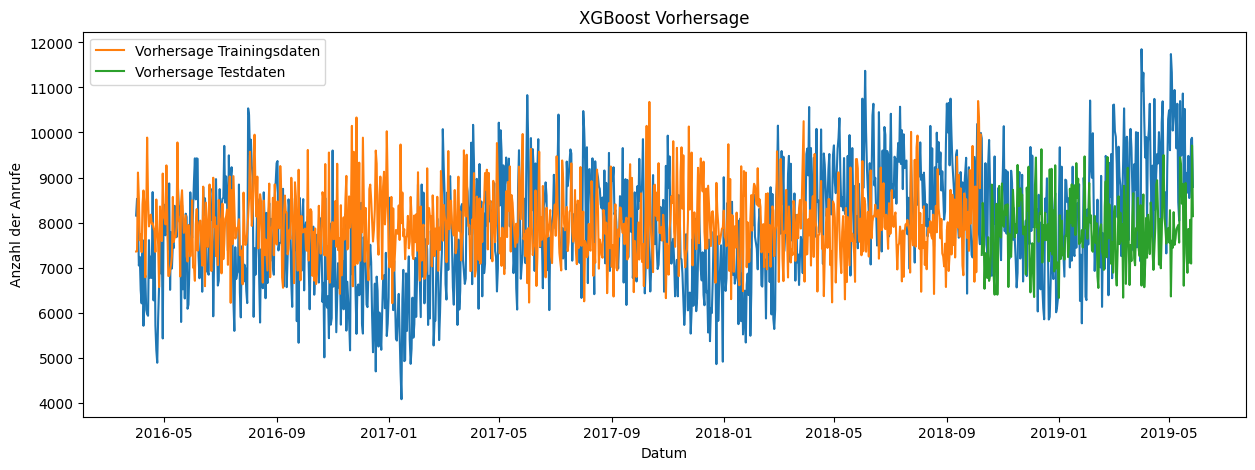

In [29]:
# Plot
# ==============================================================================
plt.figure(figsize=(15,5))
plt.plot(df['calls'])
plt.plot(df.index[:len(train_pred)], train_pred, label = 'Vorhersage Trainingsdaten')
plt.plot(df.index[-len(y_test):], y_pred, label = 'Vorhersage Testdaten')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Anrufe')
plt.title('XGBoost Vorhersage')
plt.legend()

# **2.6. TBATS**

In [30]:
# Libraries
# ==============================================================================
! pip install tbats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tbats import TBATS

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.8 MB/s eta 0:00:00


In [31]:
# Download Data
# ==============================================================================
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df = df.asfreq('D')


In [32]:
# Model
# ==============================================================================
# Zielvariable und exogene Variablen definieren
y = df['calls']

# Train-Test-Split
# ============================================================================
train_size = 0.8
train, test = train_test_split(y, test_size=1-train_size, shuffle=False)

# TBATS-Modell erstellen und trainieren
# ============================================================================
# TBATS-Modell erstellen
tbats_estimator = TBATS(use_box_cox=False,  # Optional Box-Cox-Transformation
                        use_trend=True,     # Trendkomponente
                        use_arma_errors=True,  # ARMA-Fehler
                        seasonal_periods=[7, 365.25])  # Saisonale Perioden: Woche und Jahr

# Modell anpassen
model = tbats_estimator.fit(train)

# Vorhersage für den Test-Datensatz
# ============================================================================
forecast_steps = len(test)  # Anzahl der Schritte für die Vorhersage
test_forecast = model.forecast(steps=forecast_steps)

# Vorhersage für den Trainings-Datensatz (In-Sample)
train_fitted_values = model.y_hat

# Mean Squared Error (mae) berechnen
# ============================================================================
mae_train = mean_absolute_error(train, train_fitted_values)
mae_test = mean_absolute_error(test, test_forecast)

print(f"mae (Trainingsdaten): {mae_train}")
print(f"mae (Testdaten): {mae_test}")



mae (Trainingsdaten): 780.1544294181883
mae (Testdaten): 1116.3780918109117


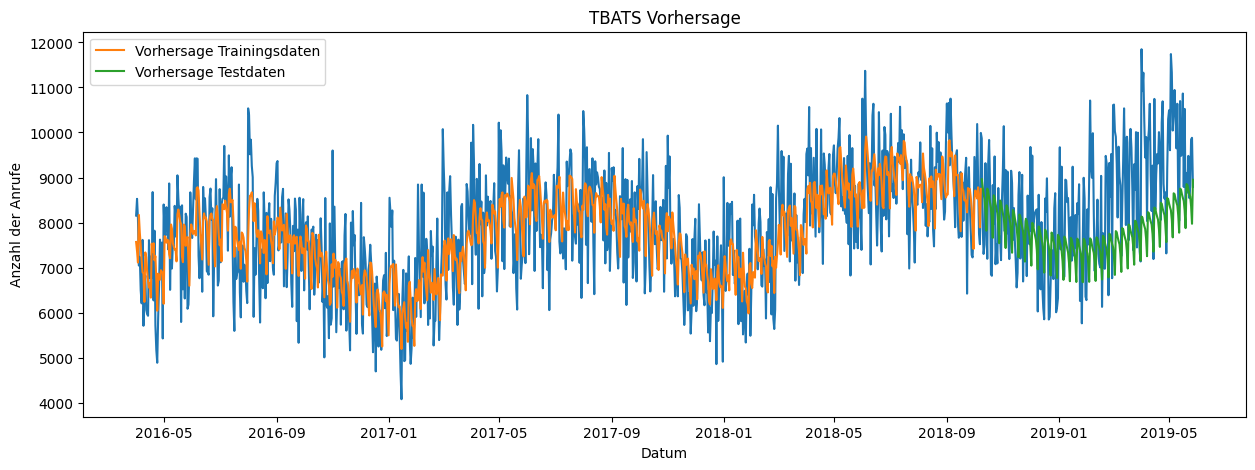

In [33]:
# Plot
# ==============================================================================
plt.figure(figsize=(15,5))
plt.plot(df['calls'])
plt.plot(df.index[:len(train_fitted_values)], train_fitted_values, label = 'Vorhersage Trainingsdaten')
plt.plot(df.index[-len(test_forecast):], test_forecast, label = 'Vorhersage Testdaten')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Anrufe')
plt.title('TBATS Vorhersage')
plt.legend()
plt.show()

# **3. Modeling_2.Cycle:**

Für die Zeitreihenanalyse wird das LightGBM Modell und die SKforecast Library verwendet. Durch Recherche hat sich herausgestellt, dass sich diese Kombination gut für diesen Use Case eignet.

Zudem existiert eine gute Dokumentation:

https://skforecast.org/0.13.0/index.html



# **3.1 Initial Model calls**

In [34]:
# Libraries
# ==============================================================================
! pip install skforecast
! pip install lightgbm
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.datasets import fetch_dataset
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.5/670.5 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


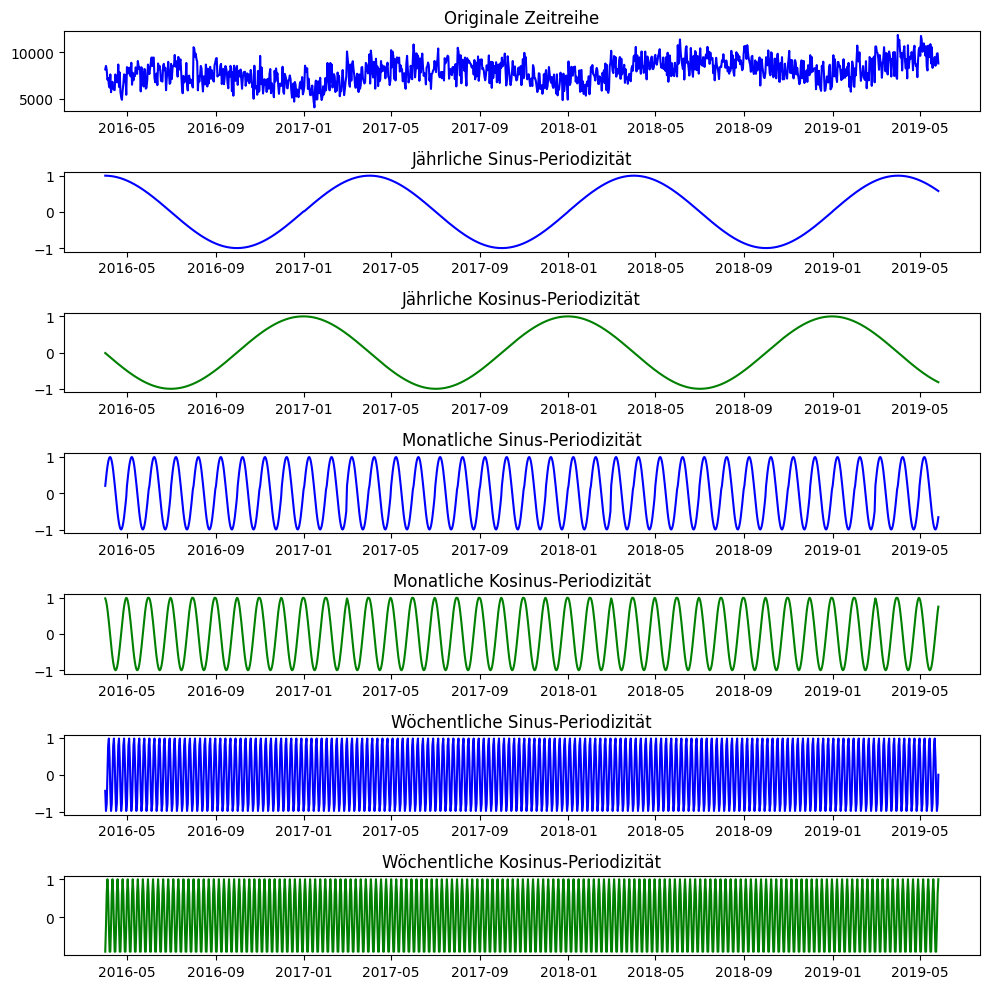

In [35]:
# Download Data
# ==============================================================================
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df = df.asfreq('D')
df.rename(columns={'calls': 'y'}, inplace=True)
data = df.copy()


plt.figure(figsize=(10,10))

# Originale Time Series:
plt.subplot(7, 1, 1)
plt.plot(data.index, data['y'], label='y', color='b')
plt.title('Originale Zeitreihe')

# Jährliche Periodizität (sin und cos)
plt.subplot(7, 1, 2)
plt.plot(data.index, data['sin_year'], label='sin_year', color='b')
plt.title('Jährliche Sinus-Periodizität')

plt.subplot(7, 1, 3)
plt.plot(data.index, data['cos_year'], label='cos_year', color='g')
plt.title('Jährliche Kosinus-Periodizität')

# Monatliche Periodizität (sin und cos)
plt.subplot(7, 1, 4)
plt.plot(data.index, data['sin_month'], label='sin_month', color='b')
plt.title('Monatliche Sinus-Periodizität')

plt.subplot(7, 1, 5)
plt.plot(data.index, data['cos_month'], label='cos_month', color='g')
plt.title('Monatliche Kosinus-Periodizität')

# Wöchentliche Periodizität (sin und cos)
plt.subplot(7, 1, 6)
plt.plot(data.index, data['sin_week'], label='sin_week', color='b')
plt.title('Wöchentliche Sinus-Periodizität')

plt.subplot(7, 1, 7)
plt.plot(data.index, data['cos_week'], label='cos_week', color='g')
plt.title('Wöchentliche Kosinus-Periodizität')

# Layout anpassen
plt.tight_layout()

# Zeige die Plots an
plt.show()

In [36]:
# Split data in train and test
# ==============================================================================
steps = 31
data_train = data.iloc[:-steps, :]
data_test  = data.iloc[-steps:, :]

In [37]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor = LGBMRegressor(random_state=123, verbose=-1,
                                          n_estimators=80,
                                          max_depth=1,
                                          learning_rate=0.2,
                                          lambda_l1=1,
                                          lambda_l2=2),
                                          lags      =  [365,364,31,14,7]
                              )

forecaster.fit(
    y    = data_train['y'],
    exog = data_train[['cos_week','sin_week']]
)

forecaster

ForecasterAutoreg 
Regressor: LGBMRegressor(lambda_l1=1, lambda_l2=2, learning_rate=0.2, max_depth=1,
              n_estimators=80, random_state=123, verbose=-1) 
Lags: [365 364  31  14   7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 365 
Weight function included: False 
Differentiation order: None 
Exogenous included: True 
Exogenous variables names: ['cos_week', 'sin_week'] 
Training range: [Timestamp('2016-04-01 00:00:00'), Timestamp('2019-04-26 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.2, 'max_depth': 1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 80, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose'

In [38]:
# Predict
# ==============================================================================
steps = 31
predictions = forecaster.predict(
                  steps = steps,
                  exog  = data_test[['cos_week', 'sin_week']]
              )

predictions.head(3)

2019-04-27    8472.889115
2019-04-28    8355.396658
2019-04-29    9085.346368
Freq: D, Name: pred, dtype: float64

In [39]:
# Predict train
# ==============================================================================
X_train, y_train = forecaster.create_train_X_y(
    y    = data_train['y'],
    exog = data_train[['cos_week','sin_week']]
)

predictions_training = forecaster.regressor.predict(X_train)
predictions_training[:4]

array([8522.11349127, 7874.25319135, 8447.7629643 , 8167.79454814])

In [40]:
# Metrics
# ==============================================================================
error_mae_test = mean_absolute_error(
    y_true=data_test['y'],
    y_pred=predictions)

error_mae_train = mean_absolute_error(
    y_true=data_train['y'].iloc[-len(predictions_training):],
    y_pred=predictions_training)

print(f'Test MAE: {error_mae_test}')
print(f'Train MAE: {error_mae_train}')

Test MAE: 827.4733739906164
Train MAE: 781.9112518517924


In [41]:
# Feature importances with exogenous variables
# ==============================================================================
forecaster.get_feature_importances().head(20)

feature  importance
0   lag_365          18
1   lag_364          14
2    lag_31          12
4     lag_7          11
3    lag_14          10
5  cos_week           8
6  sin_week           7

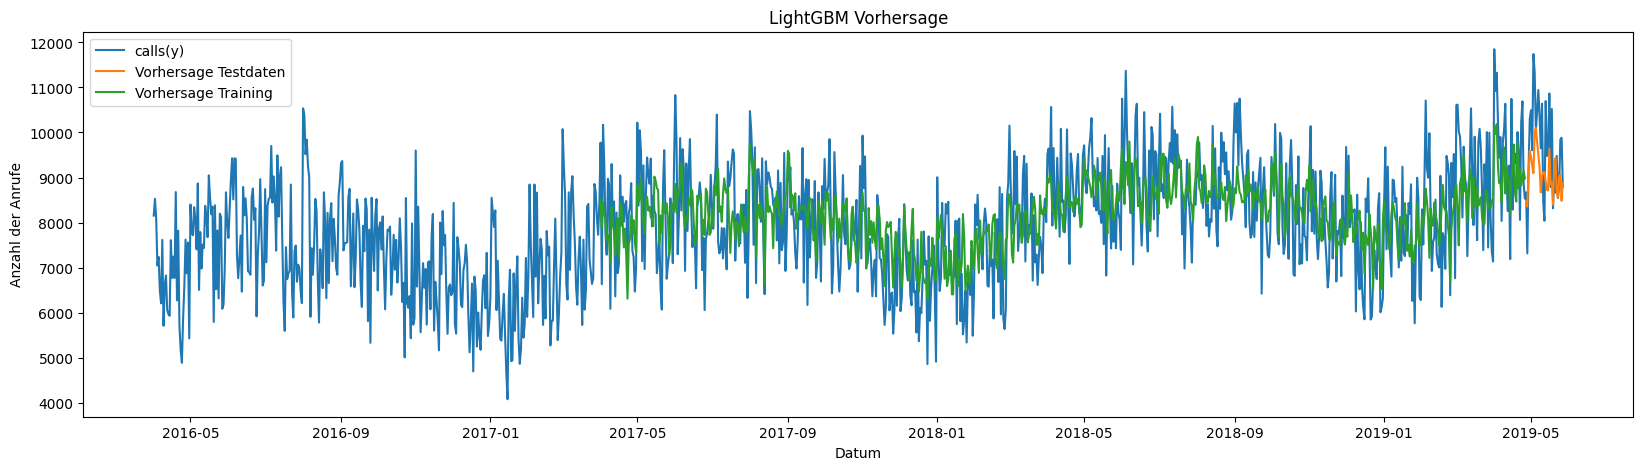

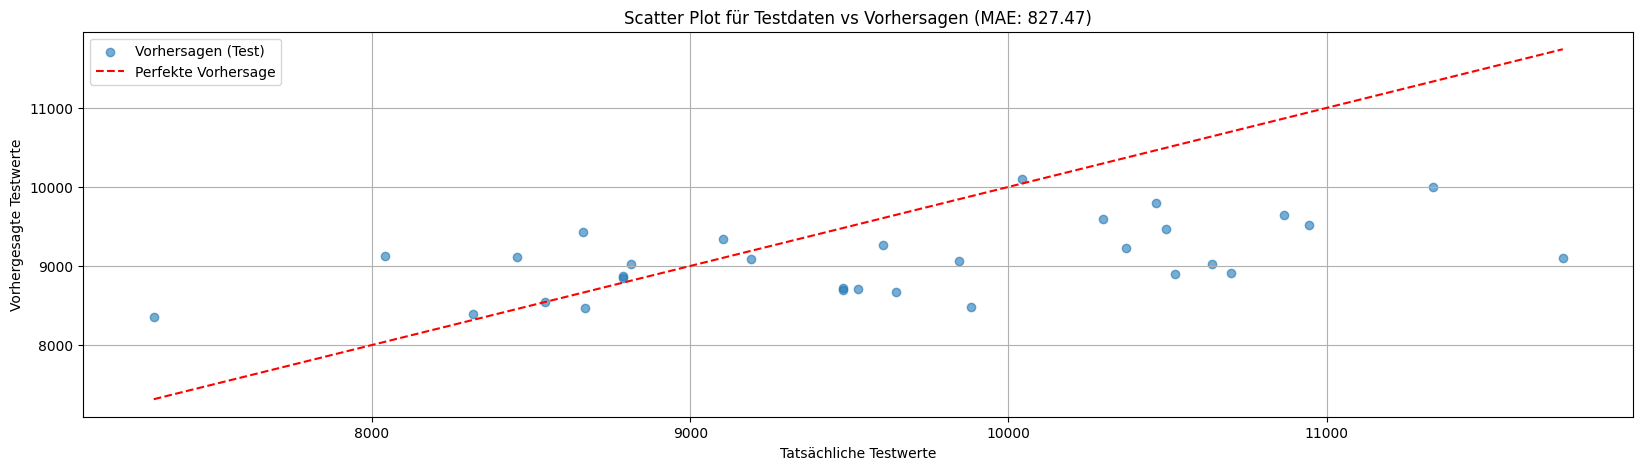

In [42]:
# Plot
# ==============================================================================
plt.figure(figsize=(20,5))
plt.plot(data['y'], label = 'calls(y)')
plt.plot(data_test.index, predictions, label='Vorhersage Testdaten')
plt.plot(data_train.index[-len(predictions_training):], predictions_training, label = 'Vorhersage Training')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Anrufe')
plt.title('LightGBM Vorhersage')
plt.legend()
plt.show()

# Scatter-Plot der tatsächlichen Testdaten und Vorhersagen auf den Testdaten
# ==============================================================================
plt.figure(figsize=(20, 5))
plt.scatter(data_test['y'], predictions, label='Vorhersagen (Test)', alpha=0.6)
plt.plot([data_test['y'].min(), data_test['y'].max()],
         [data_test['y'].min(), data_test['y'].max()],
         color='red', linestyle='--', label='Perfekte Vorhersage')
plt.xlabel('Tatsächliche Testwerte')
plt.ylabel('Vorhergesagte Testwerte')
plt.title(f'Scatter Plot für Testdaten vs Vorhersagen (MAE: {error_mae_test:.2f})')
plt.legend()
plt.grid()
plt.show()

Das Modell ist overfitted.

Im weiteren Verlauf werden die HP angepasst.

# **3.2 HPT mit Backtesting - calls**

In [43]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

from skforecast.datasets import fetch_dataset
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import random_search_forecaster
from skforecast.model_selection import bayesian_search_forecaster

In [44]:
# Download Data
# ==============================================================================
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df = df.asfreq('D')
df.rename(columns={'calls': 'y'}, inplace=True)
data = df.copy()

Train dates      : 2016-04-01 00:00:00 --- 2018-10-01 00:00:00  (n=914)
Validation dates : 2018-10-02 00:00:00 --- 2019-04-26 00:00:00  (n=207)
Test dates       : 2019-04-27 00:00:00 --- 2019-05-27 00:00:00 (n=31)


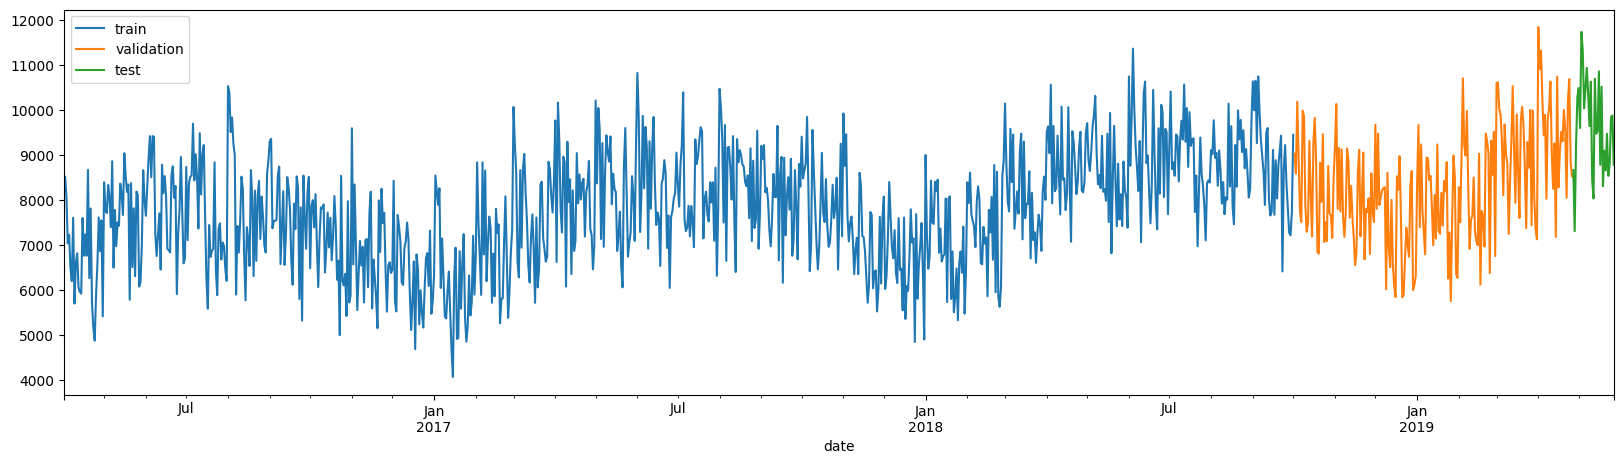

In [45]:
# Train-val-test dates
# ==============================================================================
end_train = '2018-10-01 23:59:00'
end_val = '2019-04-26 23:59:00'

print(
    f"Train dates      : {df['y'].index.min()} --- {df['y'].loc[:end_train].index.max()}"
    f"  (n={len(df['y'].loc[:end_train])})"
)
print(
    f"Validation dates : {df['y'].loc[end_train:].index.min()} --- {df['y'].loc[:end_val].index.max()}"
    f"  (n={len(df['y'].loc[end_train:end_val])})"
)
print(
    f"Test dates       : {df['y'].loc[end_val:].index.min()} --- {df['y'].index.max()}"
    f" (n={len(df['y'].loc[end_val:])})"
)

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(20, 5))
df['y'].loc[:end_train].plot(ax=ax, label='train')
df['y'].loc[end_train:end_val].plot(ax=ax, label='validation')
df['y'].loc[end_val:].plot(ax=ax, label='test')
ax.legend();

In [46]:
# Grid search hyperparameters and lags
# ==============================================================================

exog = df[[  'sin_week', 'cos_week' ]] #'cos_year', 'sin_month',

forecaster = ForecasterAutoreg(
    regressor=LGBMRegressor(random_state=123, verbose=-1),
    lags=31)

lags_grid = {
    'lags_1': [ 365,364,31,14],
    #'lags_2': [ 364,31,14], Modell overfitted zu stark im Backtesting
    #'lags_3': [ 364,14], keine gute Generalisierung

    }

param_grid = {
    'n_estimators': [70,80,90],
    'max_depth': [1],
    'learning_rate': [0.1,0.2,0.3],
    'lambda_l1': [0.5,1,2],
    'lambda_l2': [1,2],
    #'min_child_samples': [4,5,6],
    }



# Grid search
# ==============================================================================
results = grid_search_forecaster(
    forecaster=forecaster,
    y=df['y'].loc[:end_val],  # Zielvariable
    exog=exog.loc[:end_val],  # Exogene Variablen
    param_grid=param_grid,
    lags_grid=lags_grid,
    steps=31,
    refit=True,
    metric='mean_absolute_error',
    initial_train_size=len(df.loc[:end_train]),
    fixed_train_size=False,
    return_best=True,
    n_jobs='auto',
    verbose=False,
    show_progress=True
)

results

Number of models compared: 54.


lags grid:   0%|          | 0/1 [00:00<?, ?it/s]

params grid:   0%|          | 0/54 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [365 364  31  14] 
  Parameters: {'lambda_l1': 2, 'lambda_l2': 1, 'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 80}
  Backtesting metric: 935.092118848404



lags lags_label  \
40  [365, 364, 31, 14]     lags_1   
22  [365, 364, 31, 14]     lags_1   
4   [365, 364, 31, 14]     lags_1   
39  [365, 364, 31, 14]     lags_1   
38  [365, 364, 31, 14]     lags_1   
21  [365, 364, 31, 14]     lags_1   
3   [365, 364, 31, 14]     lags_1   
2   [365, 364, 31, 14]     lags_1   
20  [365, 364, 31, 14]     lags_1   
11  [365, 364, 31, 14]     lags_1   
29  [365, 364, 31, 14]     lags_1   
47  [365, 364, 31, 14]     lags_1   
48  [365, 364, 31, 14]     lags_1   
30  [365, 364, 31, 14]     lags_1   
12  [365, 364, 31, 14]     lags_1   
41  [365, 364, 31, 14]     lags_1   
23  [365, 364, 31, 14]     lags_1   
5   [365, 364, 31, 14]     lags_1   
49  [365, 364, 31, 14]     lags_1   
31  [365, 364, 31, 14]     lags_1   
13  [365, 364, 31, 14]     lags_1   
50  [365, 364, 31, 14]     lags_1   
1   [365, 364, 31, 14]     lags_1   
19  [365, 364, 31, 14]     lags_1   
37  [365, 364, 31, 14]     lags_1   
32  [365, 364, 31, 14]     lags_1   
14  [365, 364, 31, 14]     lags_1   
51  [365, 364, 31, 14]     lags_1   
33  [365, 364, 31, 14]     lags_1   
15  [365, 364, 31, 14]     lags_1   
52  [365, 364, 31, 14]     lags_1   
34  [365, 364, 31, 14]     lags_1   
16  [365, 364, 31, 14]     lags_1   
10  [365, 364, 31, 14]     lags_1   
28  [365, 364, 31, 14]     lags_1   
46  [365, 364, 31, 14]     lags_1   
0   [365, 364, 31, 14]     lags_1   
18  [365, 364, 31, 14]     lags_1   
36  [365, 364, 31, 14]     lags_1   
9   [365, 364, 31, 14]     lags_1   
27  [365, 364, 31, 14]     lags_1   
45  [365, 364, 31, 14]     lags_1   
53  [365, 364, 31, 14]     lags_1   
35  [365, 364, 31, 14]     lags_1   
17  [365, 364, 31, 14]     lags_1   
42  [365, 364, 31, 14]     lags_1   
24  [365, 364, 31, 14]     lags_1   
6   [365, 364, 31, 14]     lags_1   
43  [365, 364, 31, 14]     lags_1   
25  [365, 364, 31, 14]     lags_1   
7   [365, 364, 31, 14]     lags_1   
44  [365, 364, 31, 14]     lags_1   
26  [365, 364, 31, 14]     lags_1   
8   [365, 364, 31, 14]     lags_1   

                                               params  mean_absolute_error  \
40  {'lambda_l1': 2, 'lambda_l2': 1, 'learning_rat...           935.092119   
22  {'lambda_l1': 1, 'lambda_l2': 1, 'learning_rat...           935.189937   
4   {'lambda_l1': 0.5, 'lambda_l2': 1, 'learning_r...           935.189981   
39  {'lambda_l1': 2, 'lambda_l2': 1, 'learning_rat...           935.199792   
38  {'lambda_l1': 2, 'lambda_l2': 1, 'learning_rat...           935.445089   
21  {'lambda_l1': 1, 'lambda_l2': 1, 'learning_rat...           935.567174   
3   {'lambda_l1': 0.5, 'lambda_l2': 1, 'learning_r...           935.567256   
2   {'lambda_l1': 0.5, 'lambda_l2': 1, 'learning_r...           935.609906   
20  {'lambda_l1': 1, 'lambda_l2': 1, 'learning_rat...           935.610232   
11  {'lambda_l1': 0.5, 'lambda_l2': 2, 'learning_r...           935.742666   
29  {'lambda_l1': 1, 'lambda_l2': 2, 'learning_rat...           935.743010   
47  {'lambda_l1': 2, 'lambda_l2': 2, 'learning_rat...           935.743697   
48  {'lambda_l1': 2, 'lambda_l2': 2, 'learning_rat...           936.228170   
30  {'lambda_l1': 1, 'lambda_l2': 2, 'learning_rat...           936.233032   
12  {'lambda_l1': 0.5, 'lambda_l2': 2, 'learning_r...           936.233082   
41  {'lambda_l1': 2, 'lambda_l2': 1, 'learning_rat...           936.256613   
23  {'lambda_l1': 1, 'lambda_l2': 1, 'learning_rat...           936.338694   
5   {'lambda_l1': 0.5, 'lambda_l2': 1, 'learning_r...           936.338790   
49  {'lambda_l1': 2, 'lambda_l2': 2, 'learning_rat...           936.673827   
31  {'lambda_l1': 1, 'lambda_l2': 2, 'learning_rat...           936.675787   
13  {'lambda_l1': 0.5, 'lambda_l2': 2, 'learning_r...           936.675931   
50  {'lambda_l1': 2, 'lambda_l2': 2, 'learning_rat...           937.290632   
1   {'lambda_l1': 0.5, 'lambda_l2': 1, 'learning_r...           937.516679   
19  {'lambda_l1': 1, 'lambda_l2': 1, 'learning_rat...           937.517071   
37  {'lambda_l1': 2, 'lambda_l2'

# **3.3 Backtesting - calls**

In [47]:
# Libraries
# ==============================================================================
! pip install skforecast
import numpy as np
import pandas as pd
from skforecast.datasets import fetch_dataset
from sklearn.metrics import mean_absolute_error

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from skforecast.plot import plot_residuals
from skforecast.plot import plot_prediction_distribution
from skforecast.plot import plot_prediction_intervals
from pprint import pprint
plt.style.use('seaborn-v0_8-darkgrid')

# Modelling and Forecasting
# ==============================================================================
from scipy.stats import norm
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_pinball_loss
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import backtesting_forecaster

# Configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

In [48]:
1# Download Data
# ==============================================================================
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df = df.asfreq('D')
df.rename(columns={'calls': 'y'}, inplace=True)
data = df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train dates      : 2016-04-01 00:00:00 --- 2018-10-01 00:00:00  (n=914)
Validation dates : 2018-10-02 00:00:00 --- 2019-05-27 00:00:00  (n=238)


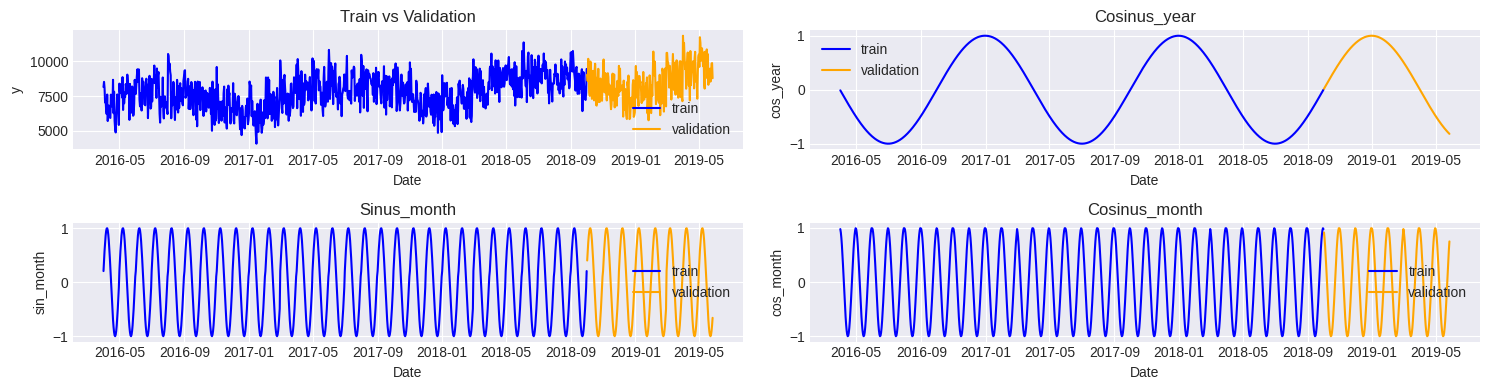

y  sin_year  sin_month  cos_month
date                                            
2016-04-01  8154  0.999930   0.204552   0.978856
2016-04-02  8526  0.999579   0.400454   0.916317
2016-04-03  8088  0.998932   0.579421   0.815028
2016-04-04  7044  0.997989   0.733885   0.679273

In [49]:
# Train-validation dates
# ==============================================================================
end_train = '2018-10-01 23:59:00'


print(
    f"Train dates      : {df['y'].index.min()} --- {df['y'].loc[:end_train].index.max()}"
    f"  (n={len(df['y'].loc[:end_train])})"
)
print(
    f"Validation dates : {df['y'].loc[end_train:].index.min()} --- {df['y'].index.max()}"
    f"  (n={len(df['y'].loc[end_train:])})"
)


# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 4))
# Train und Validation Set:
plt.subplot(2, 2, 1)
plt.plot(df['y'].loc[:end_train].index, df['y'].loc[:end_train], label='train', color='blue')
plt.plot(df['y'].loc[end_train:].index, df['y'].loc[end_train:], label = 'validation', color='orange')
plt.legend()
plt.title('Train vs Validation')
plt.xlabel('Date')
plt.ylabel('y')

# Sinus year:
plt.subplot(2, 2, 2)
plt.plot(df['cos_year'].loc[:end_train].index, df['cos_year'].loc[:end_train], label='train', color='blue')
plt.plot(df['cos_year'].loc[end_train:].index, df['cos_year'].loc[end_train:], label = 'validation', color='orange')
plt.legend()
plt.title('Cosinus_year')
plt.xlabel('Date')
plt.ylabel('cos_year')

# Sinus month:
plt.subplot(2,2,3)
plt.plot(df['sin_month'].loc[:end_train].index, df['sin_month'].loc[:end_train], label='train', color='blue')
plt.plot(df['sin_month'].loc[end_train:].index, df['sin_month'].loc[end_train:], label='validation', color='orange')
plt.legend()
plt.title('Sinus_month')
plt.xlabel('Date')
plt.ylabel('sin_month')

plt.subplot(2,2,4)
plt.plot(df['cos_month'].loc[:end_train].index, df['cos_month'].loc[:end_train], label='train', color='blue')
plt.plot(df['cos_month'].loc[end_train:].index, df['cos_month'].loc[end_train:], label='validation', color='orange')
plt.legend()
plt.title('Cosinus_month')
plt.xlabel('Date')
plt.ylabel('cos_month')
plt.tight_layout()
plt.show()

display(df[['y','sin_year','sin_month','cos_month']].head(4))

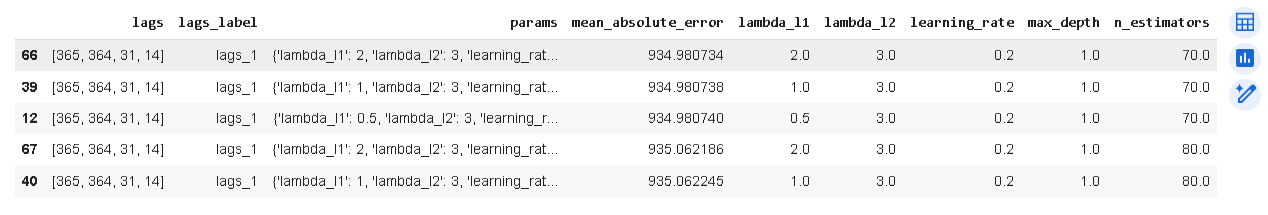

In [50]:
# Backtest forecaster exogenous variables
# ==============================================================================
exog = df[['sin_week', 'cos_week']]


forecaster = ForecasterAutoreg(
                 regressor = LGBMRegressor(random_state=123, verbose=-1,
                                          n_estimators=80, #80
                                          max_depth=1, #1
                                          learning_rate=0.2, #0.2
                                          lambda_l1=1, #1
                                          lambda_l2=2),#2
                                          lags      =  [365,364,14,31,7]
                              )


metric, predictions = backtesting_forecaster(
                          forecaster            = forecaster,
                          y                     = df['y'],
                          exog                  = exog,
                          steps                 = 31,
                          metric                = 'mean_absolute_error',
                          initial_train_size    = len(df.loc[:end_train]),
                          fixed_train_size      = False,
                          gap                   = 0,
                          allow_incomplete_fold = True,
                          refit                 = True,
                          verbose               = True,
                          show_progress         = True,
                          interval              = [2.5, 97.5],  # 95% Konfidenzintervall


                      )

predictions.to_excel('predictions_calls.xlsx')

Information of backtesting process
----------------------------------
Number of observations used for initial training: 914
Number of observations used for backtesting: 238
    Number of folds: 8
    Number skipped folds: 0 
    Number of steps per fold: 31
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 21 observations.

Fold: 0
    Training:   2016-04-01 00:00:00 -- 2018-10-01 00:00:00  (n=914)
    Validation: 2018-10-02 00:00:00 -- 2018-11-01 00:00:00  (n=31)
Fold: 1
    Training:   2016-04-01 00:00:00 -- 2018-11-01 00:00:00  (n=945)
    Validation: 2018-11-02 00:00:00 -- 2018-12-02 00:00:00  (n=31)
Fold: 2
    Training:   2016-04-01 00:00:00 -- 2018-12-02 00:00:00  (n=976)
    Validation: 2018-12-03 00:00:00 -- 2019-01-02 00:00:00  (n=31)
Fold: 3
    Training:   2016-04-01 00:00:00 -- 2019-01-02 00:00:00  (n=1007)
    Validation: 2019-01-03 00:00:00 -- 2019-02-02 00:00:00  (n=31)
Fold: 4
    Training:   2016-04-01 00:00

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/8 [00:00<?, ?it/s]

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [51]:
# Backtest error and predictions
# ==============================================================================
display(metric)
print('\n')
predictions.head(4)
print('\n')

# Backtest error and predictions
# ==============================================================================
# Überprüfen der Struktur von 'backtest_predictions'
print(type(predictions))
print('\n')
print(predictions.head())  # Wenn predictions ein DataFrame ist
print('\n')

steps_per_fold = 31
initial_train_size = len(df.loc[:end_train])
num_folds = len(predictions) // steps_per_fold

num_folds = len(predictions) // steps_per_fold

for fold in range(num_folds):
    start = fold * steps_per_fold
    end = start + steps_per_fold

    # Holen der Vorhersagen und tatsächlichen Werte für jeden Fold
    fold_predictions = predictions.iloc[start:end]
    y_true_fold = df['y'].iloc[initial_train_size + start : initial_train_size + end]

    mae = mean_absolute_error(y_true_fold, fold_predictions['pred'])
    start_date = df.index[initial_train_size + start]
    end_date = df.index[initial_train_size + end - 1]
    print(f"Fold {fold}: MAE = {round(mae)}, Zeitraum: {start_date.date()} bis {end_date.date()}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mean_absolute_error
0            916.43332





<class 'pandas.core.frame.DataFrame'>


                   pred  lower_bound   upper_bound
2018-10-02  9115.504480  7677.847118  10454.777749
2018-10-03  9100.178660  7514.331354  10889.727857
2018-10-04  9340.378942  7616.435592  10982.077982
2018-10-05  8734.505631  7149.189989  10524.054828
2018-10-06  8223.936277  6550.849425   9832.520517


Fold 0: MAE = 812, Zeitraum: 2018-10-02 bis 2018-11-01
Fold 1: MAE = 843, Zeitraum: 2018-11-02 bis 2018-12-02
Fold 2: MAE = 991, Zeitraum: 2018-12-03 bis 2019-01-02
Fold 3: MAE = 779, Zeitraum: 2019-01-03 bis 2019-02-02
Fold 4: MAE = 1147, Zeitraum: 2019-02-03 bis 2019-03-05
Fold 5: MAE = 1030, Zeitraum: 2019-03-06 bis 2019-04-05
Fold 6: MAE = 908, Zeitraum: 2019-04-06 bis 2019-05-06


In [52]:
# Filtern der Zielvariable und der exogenen Variablen bis end_train
y_train_filtered = df['y'].loc[:end_train]
exog_filtered = exog.loc[:end_train]

# Trainiere den Forecaster (Model fitting) nur mit den gefilterten Daten
# ==============================================================================
forecaster.fit(
    y=y_train_filtered,  # Gefilterte Zielvariable
    exog=exog_filtered   # Gefilterte exogene Variablen
)

# Berechnung der Trainingsvorhersagen (In-Sample)
# ==============================================================================
X_train, y_train = forecaster.create_train_X_y(y_train_filtered, exog=exog_filtered)  # Erstelle X_train und y_train
predictions_training = forecaster.regressor.predict(X_train)  # Vorhersagen auf den gefilterten Trainingsdaten

print(predictions_training[:5])

mae_train = mean_absolute_error(y_train, predictions_training)
print(f"MAE für die Trainingsvorhersagen: {round(mae_train)}")

[8603.3561495  7776.65974514 8372.57480889 8196.1339743  7851.55103792]
MAE für die Trainingsvorhersagen: 737


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


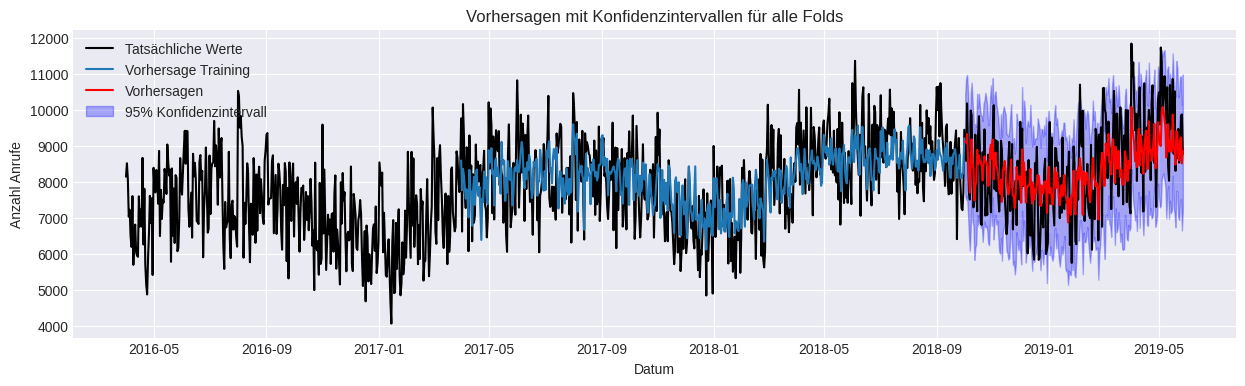

Gesamter MAE über alle Folds: 916


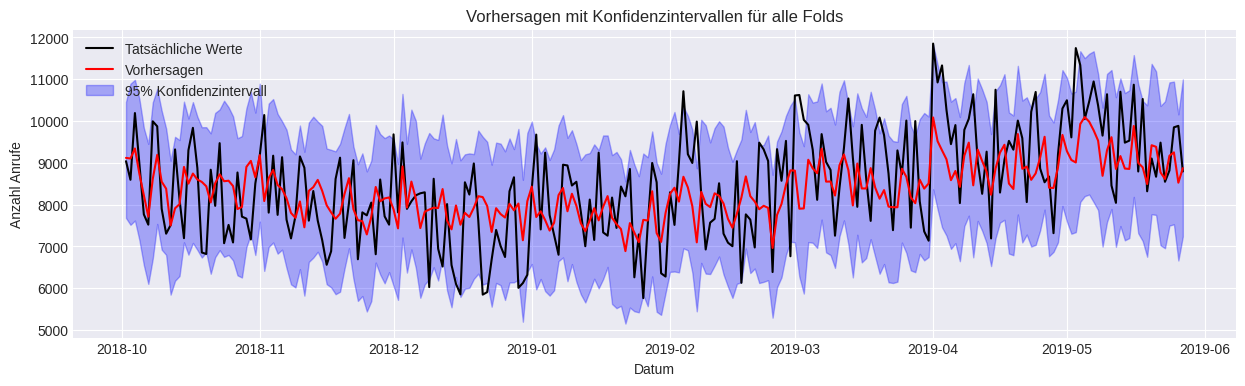

In [53]:
# Plot prediction interval für alle Folds
# ==============================================================================
import matplotlib.pyplot as plt
import numpy as np
import skforecast
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

plt.figure(figsize=(15, 4))
plt.plot(df['y'].index, df['y'], label="Tatsächliche Werte", color="black")
plt.plot(X_train.index[-len(predictions_training):], predictions_training, label = 'Vorhersage Training')
plt.plot(predictions.index, predictions['pred'], label="Vorhersagen", color="red")
plt.fill_between(
    predictions.index,
    predictions['lower_bound'],
    predictions['upper_bound'],
    color='blue',
    alpha=0.3,
    label='95% Konfidenzintervall'
)

plt.title("Vorhersagen mit Konfidenzintervallen für alle Folds")
plt.xlabel("Datum")
plt.ylabel("Anzahl Anrufe")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()
error_mae_all = mean_absolute_error(
    y_true=df['y'].iloc[len(df) - len(predictions):],
    y_pred=predictions['pred']
)


print(f"Gesamter MAE über alle Folds: {round(error_mae_all)}")


plt.figure(figsize=(15, 4))
plt.plot(df['y'].index[-len(predictions):], df['y'][-len(predictions):], label="Tatsächliche Werte", color="black")
plt.plot(predictions.index, predictions['pred'], label="Vorhersagen", color="red")
plt.fill_between(
    predictions.index,
    predictions['lower_bound'],
    predictions['upper_bound'],
    color='blue',
    alpha=0.3,
    label='95% Konfidenzintervall'
)

plt.title("Vorhersagen mit Konfidenzintervallen für alle Folds")
plt.xlabel("Datum")
plt.ylabel("Anzahl Anrufe")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


# **3.4 Initial Model n_sick**

In [54]:
# Libraries
# ==============================================================================
!pip install skforecast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.datasets import fetch_dataset
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# Download Data
# ==============================================================================
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df = df.asfreq('D')
df.rename(columns={'n_sick': 'y'}, inplace=True)
data = df.copy()


In [56]:
#Split data in train and test
# ==============================================================================
steps = 31
data_train = df.iloc[:-steps, :]
data_test  = df.iloc[-steps:, :]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


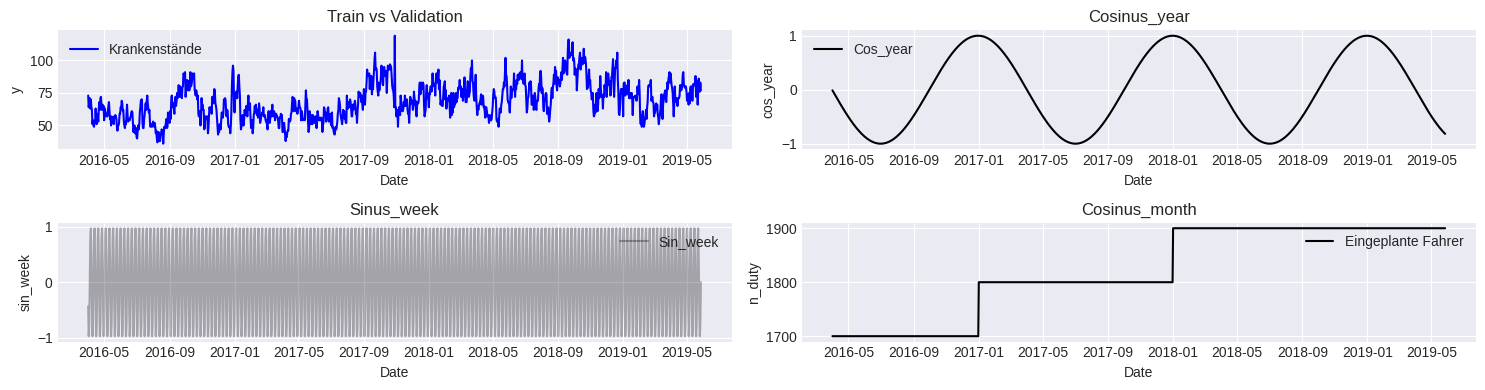

y  sin_year  sin_month  cos_month
date                                          
2016-04-01  73  0.999930   0.204552   0.978856
2016-04-02  64  0.999579   0.400454   0.916317
2016-04-03  68  0.998932   0.579421   0.815028
2016-04-04  71  0.997989   0.733885   0.679273

In [57]:
# Plot
# ==============================================================================


plt.figure(figsize=(15, 4))
# Train und Validation Set:
plt.subplot(2, 2, 1)
plt.plot(df['y'], label='Krankenstände', color='blue')
plt.legend()
plt.title('Train vs Validation')
plt.xlabel('Date')
plt.ylabel('y')


# Sinus year:
plt.subplot(2, 2, 2)
plt.plot(df['cos_year'], label='Cos_year', color='black')
plt.legend()
plt.title('Cosinus_year')
plt.xlabel('Date')
plt.ylabel('cos_year')

# Sinus week:
plt.subplot(2,2,3)
plt.plot(df['sin_week'], label='Sin_week', color='black', alpha = 0.3)
plt.legend()
plt.title('Sinus_week')
plt.xlabel('Date')
plt.ylabel('sin_week')

plt.subplot(2,2,4)
plt.plot(df['n_duty'], label='Eingeplante Fahrer', color='black')
plt.legend()
plt.title('Cosinus_month')
plt.xlabel('Date')
plt.ylabel('n_duty')




# Layout anpassen
plt.tight_layout()
# Zeige die Plots an
plt.show()


display(df[['y','sin_year','sin_month','cos_month']].head(4))


In [58]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
    regressor = LGBMRegressor(random_state=123, verbose=-1,
                              n_estimators=90,
                              max_depth=1,
                              learning_rate=0.1,
                              lambda_l1=2,
                              lambda_l2=4),


    #lags=365
    lags=[30,31]

)

forecaster.fit(
    y=data_train['y'],
    exog=data_train[[ 'n_duty','sin_year','sin_week']] #Features wurde über Feature importance angepasst und selektiert
)

forecaster

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ForecasterAutoreg 
Regressor: LGBMRegressor(lambda_l1=2, lambda_l2=4, max_depth=1, n_estimators=90,
              random_state=123, verbose=-1) 
Lags: [30 31] 
Transformer for y: None 
Transformer for exog: None 
Window size: 31 
Weight function included: False 
Differentiation order: None 
Exogenous included: True 
Exogenous variables names: ['n_duty', 'sin_year', 'sin_week'] 
Training range: [Timestamp('2016-04-01 00:00:00'), Timestamp('2019-04-26 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 90, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': -1, 'lambda_l1': 2, 'l

In [59]:
# Predict Testdaten
# ==============================================================================
predictions= forecaster.predict_interval(
    steps=steps,
    exog=data_test[[ 'n_duty','sin_year','sin_week']],
    interval=[2.5, 97.5]  # 95% Konfidenzintervall für Testdaten
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
# Prdict Trainingsdaten
# ==============================================================================
# Erstelle die Lag-Matrizen und exogene Variablen für die Trainingsdaten
X_train, y_train = forecaster.create_train_X_y(
    y=data_train['y'],
    exog=data_train[[ 'n_duty','sin_year','sin_week']]
)
predictions_training = forecaster.regressor.predict(X_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
# Berechnung des MAE (Testdaten)
# ==============================================================================
error_mae_test = mean_absolute_error(
    y_true=data_test['y'],
    y_pred=predictions['pred']
)

# Berechnung des MAE (Trainingsdaten)
# ==============================================================================
error_mae_train = mean_absolute_error(
    y_true=data_train['y'].iloc[-len(predictions_training):],  # Gleiche Länge wie die Vorhersagen
    y_pred=predictions_training
)


print(f"Test error (MAE): {error_mae_test}")
print(f"Train error (MAE): {error_mae_train}")

Test error (MAE): 7.249562602527923
Train error (MAE): 7.321892156010641


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
forecaster.get_feature_importances()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


feature  importance
3  sin_year          41
2    n_duty          34
4  sin_week          11
1    lag_31           4
0    lag_30           0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


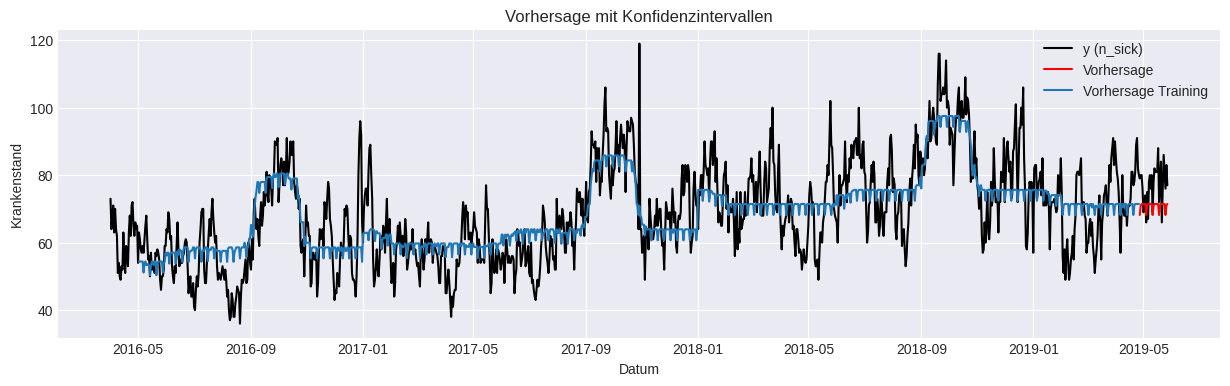

In [63]:
plt.figure(figsize=(15,4))
plt.plot(df['y'], label='y (n_sick)', color = 'black')
plt.plot(predictions.index, predictions['pred'], label='Vorhersage', color = 'red')
plt.plot(data_train.index[-len(predictions_training):], predictions_training, label = 'Vorhersage Training')
plt.xlabel('Datum')
plt.ylabel('Krankenstand')
plt.title('Vorhersage mit Konfidenzintervallen')
plt.legend()
plt.show()


# **3.5 HPT mit Backtesting - n_sick**

In [64]:
# Libraries
# ==============================================================================
!pip install skforecast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

from skforecast.datasets import fetch_dataset
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import random_search_forecaster
from skforecast.model_selection import bayesian_search_forecaster

In [65]:
# Download Data
# ==============================================================================
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df = df.asfreq('D')
df.rename(columns={'n_sick': 'y'}, inplace=True)
data = df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train dates      : 2016-04-01 00:00:00 --- 2018-10-01 00:00:00  (n=914)
Validation dates : 2018-10-02 00:00:00 --- 2019-04-26 00:00:00  (n=207)
Test dates       : 2019-04-27 00:00:00 --- 2019-05-27 00:00:00 (n=31)


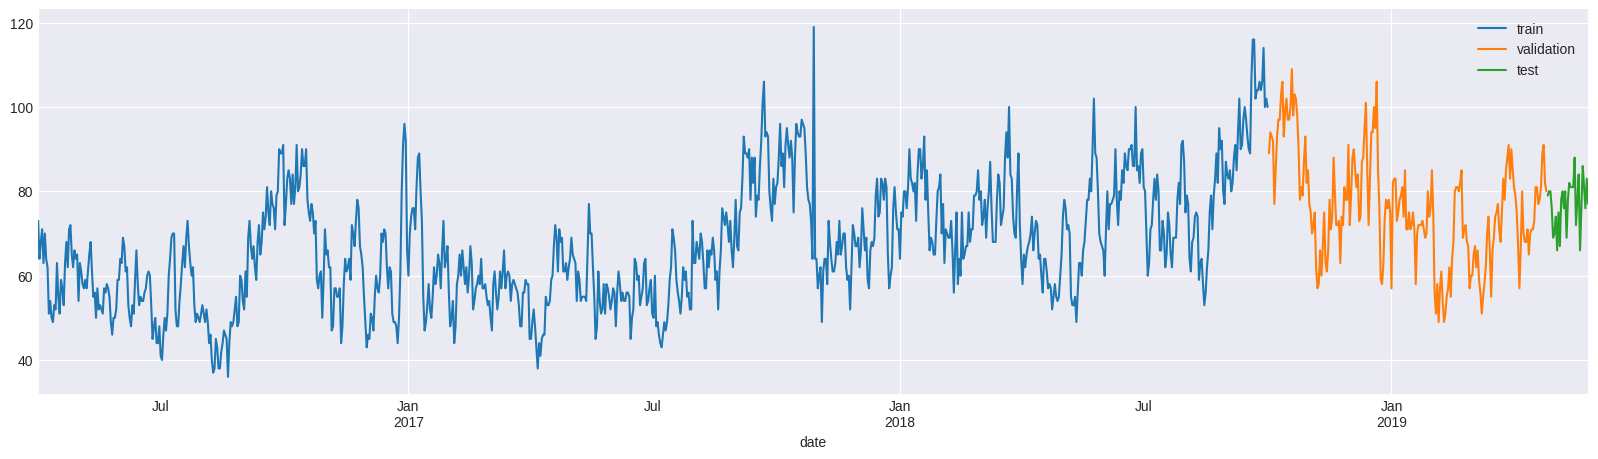

In [66]:
# Train-val-test dates
# ==============================================================================
end_train = '2018-10-01 23:59:00'
end_val = '2019-04-26 23:59:00'

print(
    f"Train dates      : {df['y'].index.min()} --- {df['y'].loc[:end_train].index.max()}"
    f"  (n={len(df['y'].loc[:end_train])})"
)
print(
    f"Validation dates : {df['y'].loc[end_train:].index.min()} --- {df['y'].loc[:end_val].index.max()}"
    f"  (n={len(df['y'].loc[end_train:end_val])})"
)
print(
    f"Test dates       : {df['y'].loc[end_val:].index.min()} --- {df['y'].index.max()}"
    f" (n={len(df['y'].loc[end_val:])})"
)

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(20, 5))
df['y'].loc[:end_train].plot(ax=ax, label='train')
df['y'].loc[end_train:end_val].plot(ax=ax, label='validation')
df['y'].loc[end_val:].plot(ax=ax, label='test')
ax.legend();

In [67]:
# Grid search hyperparameters and lags
# ==============================================================================

exog = df[['n_duty','sin_year','sin_week']]

forecaster = ForecasterAutoreg(
    regressor=LGBMRegressor(random_state=123, verbose=-1),
    lags=31)

lags_grid = {
    'lags_1': [ 31,30],
    'lags_2': [ 364,31,30],
    'lags_3': [ 364,14],

    }

param_grid = {
    'n_estimators': [90,100,110],
    'max_depth': [1,2],
    'learning_rate': [0.1,0.2,0.3],
    'lambda_l1': [0.5,1,2],
    'lambda_l2': [2,3,4],
    #'min_child_samples': [4,5,6],
    }



# Grid search
# ==============================================================================
results = grid_search_forecaster(
    forecaster=forecaster,
    y=df['y'].loc[:end_val],  # Zielvariable
    exog=exog.loc[:end_val],  # Exogene Variablen
    param_grid=param_grid,
    lags_grid=lags_grid,
    steps=31,
    refit=True,
    metric='mean_absolute_error',
    initial_train_size=len(df.loc[:end_train]),
    fixed_train_size=False,
    return_best=True,
    n_jobs='auto',
    verbose=False,
    show_progress=True
)

results

Number of models compared: 486.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/162 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [31 30] 
  Parameters: {'lambda_l1': 2, 'lambda_l2': 4, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 90}
  Backtesting metric: 7.899726029384806



lags lags_label  \
144       [31, 30]     lags_1   
90        [31, 30]     lags_1   
36        [31, 30]     lags_1   
126       [31, 30]     lags_1   
18        [31, 30]     lags_1   
..             ...        ...   
214  [364, 31, 30]     lags_2   
232  [364, 31, 30]     lags_2   
179  [364, 31, 30]     lags_2   
287  [364, 31, 30]     lags_2   
233  [364, 31, 30]     lags_2   

                                                params  mean_absolute_error  \
144  {'lambda_l1': 2, 'lambda_l2': 4, 'learning_rat...             7.899726   
90   {'lambda_l1': 1, 'lambda_l2': 4, 'learning_rat...             7.899878   
36   {'lambda_l1': 0.5, 'lambda_l2': 4, 'learning_r...             7.901565   
126  {'lambda_l1': 2, 'lambda_l2': 3, 'learning_rat...             7.902930   
18   {'lambda_l1': 0.5, 'lambda_l2': 3, 'learning_r...             7.904469   
..                                                 ...                  ...   
214  {'lambda_l1': 0.5, 'lambda_l2': 4, 'learning_r...             9.668668   
232  {'lambda_l1': 1, 'lambda_l2': 2, 'learning_rat...             9.673546   
179  {'lambda_l1': 0.5, 'lambda_l2': 2, 'learning_r...             9.689587   
287  {'lambda_l1': 2, 'lambda_l2': 2, 'learning_rat...             9.696219   
233  {'lambda_l1': 1, 'lambda_l2': 2, 'learning_rat...             9.706358   

     lambda_l1  lambda_l2  learning_rate  max_depth  n_estimators  
144        2.0        4.0            0.1        1.0          90.0  
90         1.0        4.0            0.1        1.0          90.0  
36         0.5        4.0            0.1        1.0          90.0  
126        2.0        3.0            0.1        1.0          90.0  
18         0.5        3.0            0.1        1.0          90.0  
..         ...        ...            ...        ...           ...  
214        0.5        4.0            0.3        2.0         100.0  
232        1.0        2.0            0.3        2.0         100.0  
179        0.5        2.0            0.3        2.0         110.0  
287        2.0        2.0            0.3        2.0         110.0  
233        1.0        2.0            0.3        2.0         110.0  

[486 rows x 9 columns]

# **3.6 Backtesting - n_sick**

In [68]:
# Libraries
# ==============================================================================
! pip install skforecast
import numpy as np
import pandas as pd
from skforecast.datasets import fetch_dataset
from sklearn.metrics import mean_absolute_error

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from skforecast.plot import plot_residuals
from skforecast.plot import plot_prediction_distribution
from skforecast.plot import plot_prediction_intervals
from pprint import pprint
plt.style.use('seaborn-v0_8-darkgrid')

# Modelling and Forecasting
# ==============================================================================
from scipy.stats import norm
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_pinball_loss
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import backtesting_forecaster

# Configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
1# Download Data
# ==============================================================================
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df = df.asfreq('D')
df.rename(columns={'n_sick': 'y'}, inplace=True)
data = df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train dates      : 2016-04-01 00:00:00 --- 2018-10-01 00:00:00  (n=914)
Validation dates : 2018-10-02 00:00:00 --- 2019-05-27 00:00:00  (n=238)


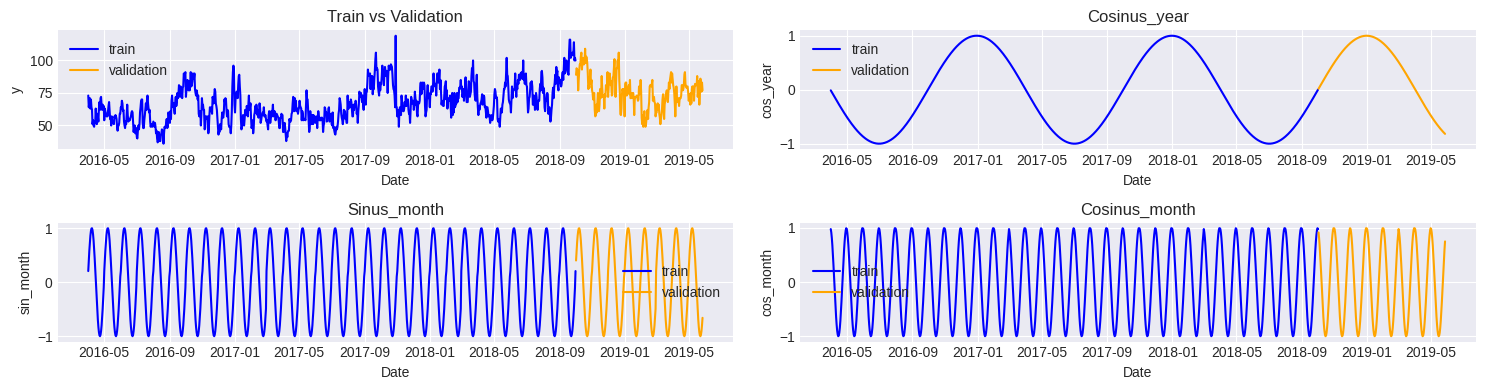

y  sin_year  sin_month  cos_month
date                                          
2016-04-01  73  0.999930   0.204552   0.978856
2016-04-02  64  0.999579   0.400454   0.916317
2016-04-03  68  0.998932   0.579421   0.815028
2016-04-04  71  0.997989   0.733885   0.679273

In [70]:
# Train-validation dates
# ==============================================================================
end_train = '2018-10-01 23:59:00'


print(
    f"Train dates      : {df['y'].index.min()} --- {df['y'].loc[:end_train].index.max()}"
    f"  (n={len(df['y'].loc[:end_train])})"
)
print(
    f"Validation dates : {df['y'].loc[end_train:].index.min()} --- {df['y'].index.max()}"
    f"  (n={len(df['y'].loc[end_train:])})"
)


# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 4))
# Train und Validation Set:
plt.subplot(2, 2, 1)
plt.plot(df['y'].loc[:end_train].index, df['y'].loc[:end_train], label='train', color='blue')
plt.plot(df['y'].loc[end_train:].index, df['y'].loc[end_train:], label = 'validation', color='orange')
plt.legend()
plt.title('Train vs Validation')
plt.xlabel('Date')
plt.ylabel('y')

# Sinus year:
plt.subplot(2, 2, 2)
plt.plot(df['cos_year'].loc[:end_train].index, df['cos_year'].loc[:end_train], label='train', color='blue')
plt.plot(df['cos_year'].loc[end_train:].index, df['cos_year'].loc[end_train:], label = 'validation', color='orange')
plt.legend()
plt.title('Cosinus_year')
plt.xlabel('Date')
plt.ylabel('cos_year')

# Sinus month:
plt.subplot(2,2,3)
plt.plot(df['sin_month'].loc[:end_train].index, df['sin_month'].loc[:end_train], label='train', color='blue')
plt.plot(df['sin_month'].loc[end_train:].index, df['sin_month'].loc[end_train:], label='validation', color='orange')
plt.legend()
plt.title('Sinus_month')
plt.xlabel('Date')
plt.ylabel('sin_month')

plt.subplot(2,2,4)
plt.plot(df['cos_month'].loc[:end_train].index, df['cos_month'].loc[:end_train], label='train', color='blue')
plt.plot(df['cos_month'].loc[end_train:].index, df['cos_month'].loc[end_train:], label='validation', color='orange')
plt.legend()
plt.title('Cosinus_month')
plt.xlabel('Date')
plt.ylabel('cos_month')
plt.tight_layout()
plt.show()

display(df[['y','sin_year','sin_month','cos_month']].head(4))

In [71]:
# Backtest forecaster exogenous variables
# ==============================================================================
exog = df[['n_duty','sin_year','sin_week']]


forecaster = ForecasterAutoreg(
                 regressor = LGBMRegressor(random_state=123, verbose=-1,
                                          n_estimators=90,
                                          max_depth=1,
                                          learning_rate=0.1,
                                          lambda_l1=1,
                                          lambda_l2=4),
                                          lags      =  [31,30]
                              )


metric, predictions = backtesting_forecaster(
                          forecaster            = forecaster,
                          y                     = df['y'],
                          exog                  = exog,
                          steps                 = 31,
                          metric                = 'mean_absolute_error',
                          initial_train_size    = len(df.loc[:end_train]),
                          fixed_train_size      = False,
                          gap                   = 0,
                          allow_incomplete_fold = True,
                          refit                 = True,
                          verbose               = True,
                          show_progress         = True,
                          interval              = [2.5, 97.5],  # 95% Konfidenzintervall


                      )

predictions.to_excel('predictions_n_sick.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Information of backtesting process
----------------------------------
Number of observations used for initial training: 914
Number of observations used for backtesting: 238
    Number of folds: 8
    Number skipped folds: 0 
    Number of steps per fold: 31
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 21 observations.

Fold: 0
    Training:   2016-04-01 00:00:00 -- 2018-10-01 00:00:00  (n=914)
    Validation: 2018-10-02 00:00:00 -- 2018-11-01 00:00:00  (n=31)
Fold: 1
    Training:   2016-04-01 00:00:00 -- 2018-11-01 00:00:00  (n=945)
    Validation: 2018-11-02 00:00:00 -- 2018-12-02 00:00:00  (n=31)
Fold: 2
    Training:   2016-04-01 00:00:00 -- 2018-12-02 00:00:00  (n=976)
    Validation: 2018-12-03 00:00:00 -- 2019-01-02 00:00:00  (n=31)
Fold: 3
    Training:   2016-04-01 00:00:00 -- 2019-01-02 00:00:00  (n=1007)
    Validation: 2019-01-03 00:00:00 -- 2019-02-02 00:00:00  (n=31)
Fold: 4
    Training:   2016-04-01 00:00

  0%|          | 0/8 [00:00<?, ?it/s]

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [72]:
# Backtest error and predictions
# ==============================================================================
display(metric)
print('\n')
predictions.head(4)
print('\n')

# Backtest error and predictions
# ==============================================================================
# Überprüfen der Struktur von 'backtest_predictions'
print(type(predictions))
print('\n')
print(predictions.head())  # Wenn predictions ein DataFrame ist
print('\n')

steps_per_fold = 31
initial_train_size = len(df.loc[:end_train])
num_folds = len(predictions) // steps_per_fold

num_folds = len(predictions) // steps_per_fold

for fold in range(num_folds):
    start = fold * steps_per_fold
    end = start + steps_per_fold

    # Holen der Vorhersagen und tatsächlichen Werte für jeden Fold
    fold_predictions = predictions.iloc[start:end]
    y_true_fold = df['y'].iloc[initial_train_size + start : initial_train_size + end]

    mae = mean_absolute_error(y_true_fold, fold_predictions['pred'])
    start_date = df.index[initial_train_size + start]
    end_date = df.index[initial_train_size + end - 1]
    print(f"Fold {fold}: MAE = {round(mae)}, Zeitraum: {start_date.date()} bis {end_date.date()}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mean_absolute_error
0              7.81115





<class 'pandas.core.frame.DataFrame'>


                 pred  lower_bound  upper_bound
2018-10-02  98.632337    82.020656   115.651777
2018-10-03  98.632337    83.638900   115.967369
2018-10-04  98.632337    81.082767   116.197944
2018-10-05  98.632337    82.006075   118.627035
2018-10-06  96.196868    80.650645   114.330084


Fold 0: MAE = 6, Zeitraum: 2018-10-02 bis 2018-11-01
Fold 1: MAE = 7, Zeitraum: 2018-11-02 bis 2018-12-02
Fold 2: MAE = 11, Zeitraum: 2018-12-03 bis 2019-01-02
Fold 3: MAE = 4, Zeitraum: 2019-01-03 bis 2019-02-02
Fold 4: MAE = 11, Zeitraum: 2019-02-03 bis 2019-03-05
Fold 5: MAE = 9, Zeitraum: 2019-03-06 bis 2019-04-05
Fold 6: MAE = 6, Zeitraum: 2019-04-06 bis 2019-05-06


In [73]:
# Filtern der Zielvariable und der exogenen Variablen bis end_train
y_train_filtered = df['y'].loc[:end_train]
exog_filtered = exog.loc[:end_train]

# Trainiere den Forecaster (Model fitting) nur mit den gefilterten Daten
# ==============================================================================
forecaster.fit(
    y=y_train_filtered,  # Gefilterte Zielvariable
    exog=exog_filtered   # Gefilterte exogene Variablen
)

# Berechnung der Trainingsvorhersagen (In-Sample)
# ==============================================================================
X_train, y_train = forecaster.create_train_X_y(y_train_filtered, exog=exog_filtered)  # Erstelle X_train und y_train
predictions_training = forecaster.regressor.predict(X_train)  # Vorhersagen auf den gefilterten Trainingsdaten

print(predictions_training[:5])

mae_train = mean_absolute_error(y_train, predictions_training)
print(f"MAE für die Trainingsvorhersagen: {round(mae_train)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[54.54710033 54.38571849 54.38571849 54.38571849 54.38571849]
MAE für die Trainingsvorhersagen: 7


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


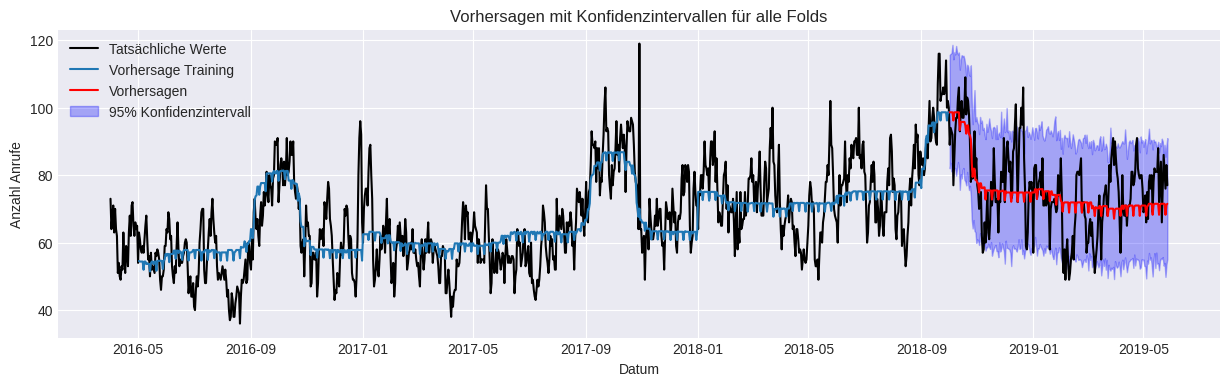

Gesamter MAE über alle Folds: 8


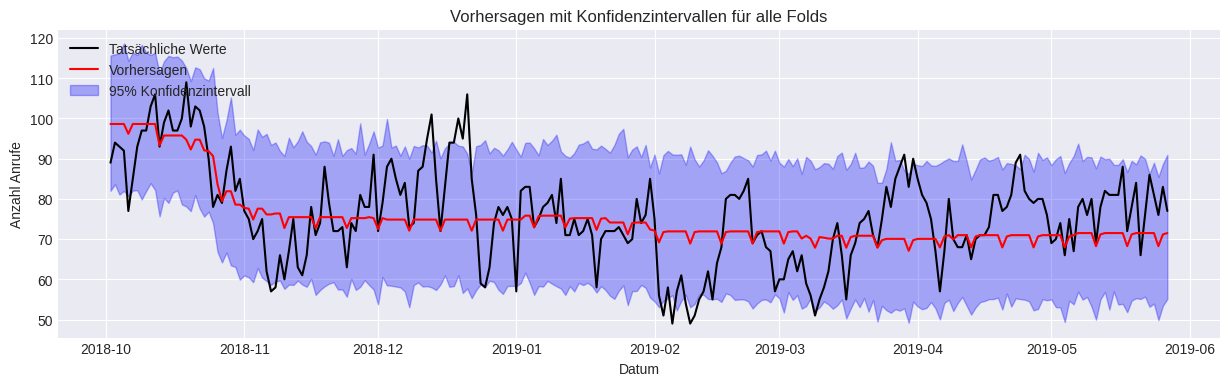

In [74]:
# Plot prediction interval für alle Folds
# ==============================================================================
import matplotlib.pyplot as plt
import numpy as np
import skforecast
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

plt.figure(figsize=(15, 4))
plt.plot(df['y'].index, df['y'], label="Tatsächliche Werte", color="black")
plt.plot(X_train.index[-len(predictions_training):], predictions_training, label = 'Vorhersage Training')
plt.plot(predictions.index, predictions['pred'], label="Vorhersagen", color="red")
plt.fill_between(
    predictions.index,
    predictions['lower_bound'],
    predictions['upper_bound'],
    color='blue',
    alpha=0.3,
    label='95% Konfidenzintervall'
)

plt.title("Vorhersagen mit Konfidenzintervallen für alle Folds")
plt.xlabel("Datum")
plt.ylabel("Anzahl Anrufe")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()
error_mae_all = mean_absolute_error(
    y_true=df['y'].iloc[len(df) - len(predictions):],
    y_pred=predictions['pred']
)


print(f"Gesamter MAE über alle Folds: {round(error_mae_all)}")


plt.figure(figsize=(15, 4))
plt.plot(df['y'].index[-len(predictions):], df['y'][-len(predictions):], label="Tatsächliche Werte", color="black")
plt.plot(predictions.index, predictions['pred'], label="Vorhersagen", color="red")
plt.fill_between(
    predictions.index,
    predictions['lower_bound'],
    predictions['upper_bound'],
    color='blue',
    alpha=0.3,
    label='95% Konfidenzintervall'
)

plt.title("Vorhersagen mit Konfidenzintervallen für alle Folds")
plt.xlabel("Datum")
plt.ylabel("Anzahl Anrufe")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

# **3.4 Regression Model**

In [75]:
# Libraries
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
# Download Data
# ==============================================================================
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])

df_up = pd.read_excel('/content/sample_data/pred_up.xlsx')
df_up['date'] = pd.to_datetime(df_up['date'])
df_up = pd.merge(df_up,df[['date','sby_need']],on = 'date', how = 'left')

df_up.set_index('date', inplace = True)
df_up = df_up.asfreq('D')
print('Hier df_up:',df_up.head())

df.set_index('date', inplace = True)
df = df.asfreq('D')
start_date = '2018-01-01'
df = df.loc[start_date:]
print('hier df:',df.head())

Hier df_up:             Unnamed: 0    pred_call  lower_bound_call  upper_bound_call  \
date                                                                      
2018-10-02           0  9182.817195       7482.513985      10984.489600   
2018-10-03           1  8931.571385       7154.210912      10436.264850   
2018-10-04           2  9307.721489       7616.543685      11109.393893   
2018-10-05           3  8946.299633       7304.169553      10518.013745   
2018-10-06           4  8372.602889       6681.425085      10075.213054   

            pred_n_sick  lower_bound_n_sick  upper_bound_n_sick  calls  \
date                                                                     
2018-10-02    98.632337           82.020656          115.651777   9036   
2018-10-03    98.632337           83.638900          115.967369   8592   
2018-10-04    98.632337           81.082767          116.197944  10188   
2018-10-05    98.632337           82.006075          118.627035   8964   
2018-10-06    96.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


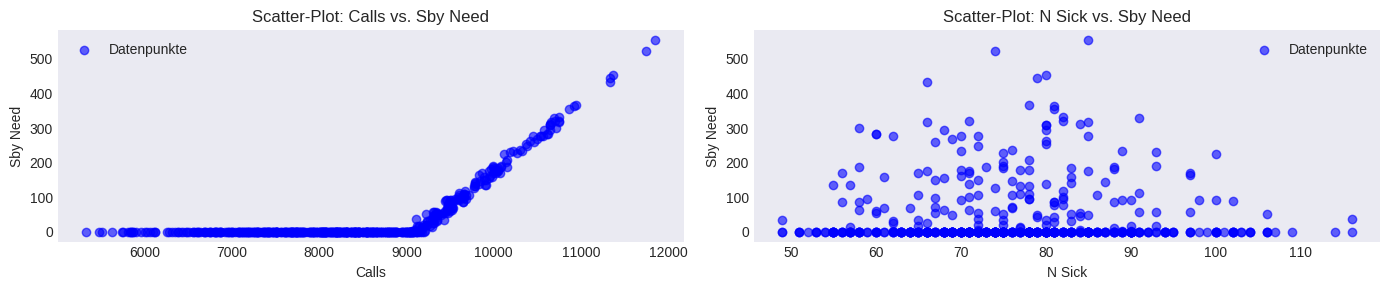

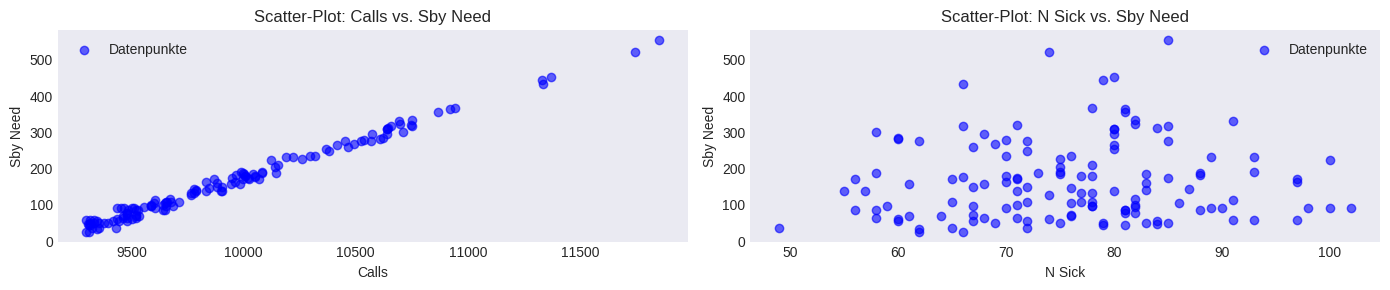

In [77]:
# Plot
# ==============================================================================

plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
plt.scatter(df['calls'], df['sby_need'], color='blue', alpha=0.6, label='Datenpunkte')
plt.xlabel('Calls')
plt.ylabel('Sby Need')
plt.title('Scatter-Plot: Calls vs. Sby Need')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(df['n_sick'], df['sby_need'], color='blue', alpha=0.6, label='Datenpunkte')
plt.xlabel('N Sick')
plt.ylabel('Sby Need')
plt.title('Scatter-Plot: N Sick vs. Sby Need')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


df = df[df['calls']>=9300]
# Plot der bereinigten Daten
# ==============================================================================
plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
plt.scatter(df['calls'], df['sby_need'], color='blue', alpha=0.6, label='Datenpunkte')
plt.xlabel('Calls')
plt.ylabel('Sby Need')
plt.title('Scatter-Plot: Calls vs. Sby Need')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(df['n_sick'], df['sby_need'], color='blue', alpha=0.6, label='Datenpunkte')
plt.xlabel('N Sick')
plt.ylabel('Sby Need')
plt.title('Scatter-Plot: N Sick vs. Sby Need')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

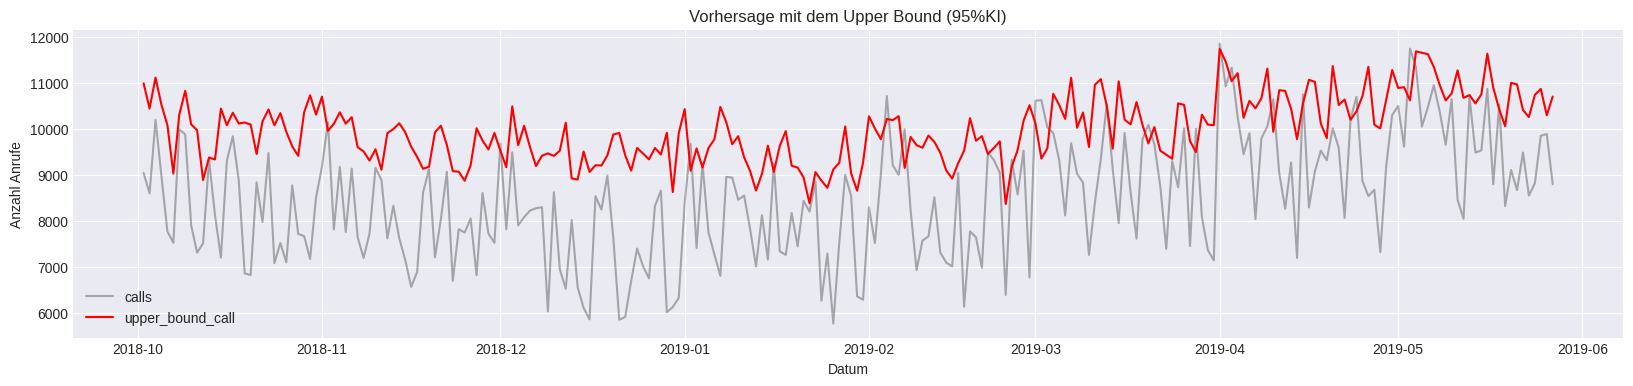

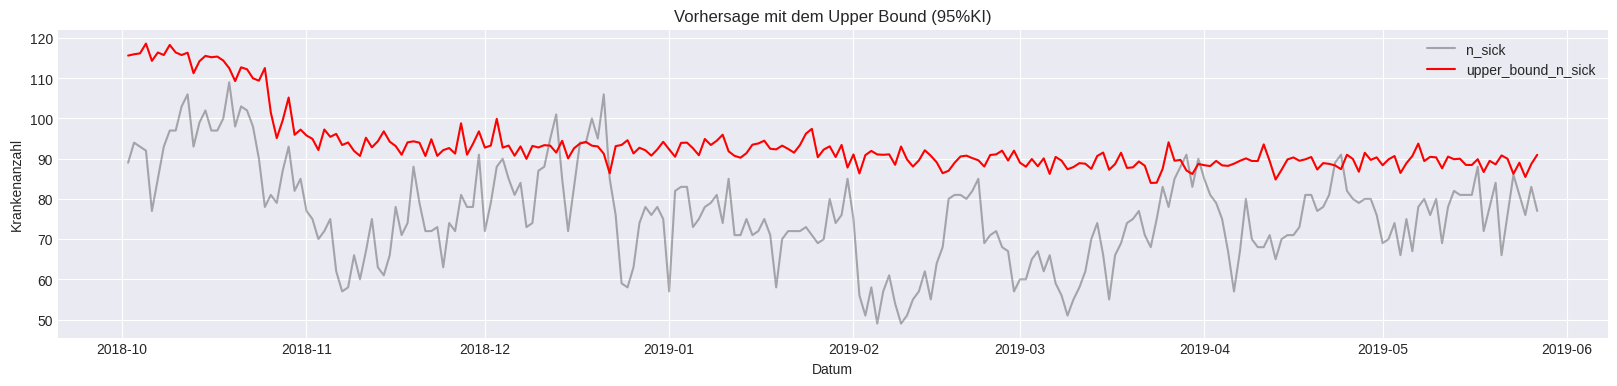

In [78]:
#Visualisierung
# ==============================================================================

plt.figure(figsize=(20,4))
plt.plot(df_up['calls'], label = 'calls', color = 'black', alpha = 0.3)
plt.plot(df_up['upper_bound_call'], label = 'upper_bound_call', color = 'red')
plt.xlabel('Datum')
plt.ylabel('Anzahl Anrufe')
plt.title('Vorhersage mit dem Upper Bound (95%KI)')
plt.legend()
plt.show()
print('\n')

plt.figure(figsize=(20,4))
plt.plot(df_up['n_sick'], label = 'n_sick', color = 'black', alpha =0.3)
plt.plot(df_up['upper_bound_n_sick'], label = 'upper_bound_n_sick', color = 'red')
plt.xlabel('Datum')
plt.ylabel('Krankenanzahl')
plt.title('Vorhersage mit dem Upper Bound (95%KI)')
plt.legend()
plt.show()

In [79]:
#Datenvorbereitung
# ==============================================================================
df_up = df_up[['upper_bound_call','upper_bound_n_sick', 'sby_need']]
df_up = df_up.rename(columns={'upper_bound_call': 'calls',
                              'upper_bound_n_sick': 'n_sick',
                              'sby_need' : 'sby_need_true',
                              })
df_up.head()

calls      n_sick  sby_need_true
date                                               
2018-10-02  10984.489600  115.651777              0
2018-10-03  10436.264850  115.967369              0
2018-10-04  11109.393893  116.197944            231
2018-10-05  10518.013745  118.627035              0
2018-10-06  10075.213054  114.330084              0

In [80]:
# Erstellung der linearen Regression
# ==============================================================================
X = df[['calls', 'n_sick']]
y = df['sby_need']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions_test = model.predict(X_test)
#predictions_test = np.maximum(predictions_test,0)
predictions_train = model.predict(X_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
# Metriken der linearen Regression
# ==============================================================================

mae_train = mean_absolute_error(y_train, predictions_train)
mae_test = mean_absolute_error(y_test, predictions_test)
r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)

print(f"MAE (Trainingsdaten): {mae_train}")
print(f"MAE (Testdaten): {mae_test}")
print(f"R²-Score (Trainingsdaten): {r2_train}")
print(f"R²-Score (Testdaten): {r2_test}")

MAE (Trainingsdaten): 0.24442290880128378
MAE (Testdaten): 0.21553907813010179
R²-Score (Trainingsdaten): 0.999992872643817
R²-Score (Testdaten): 0.9999946352652904


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


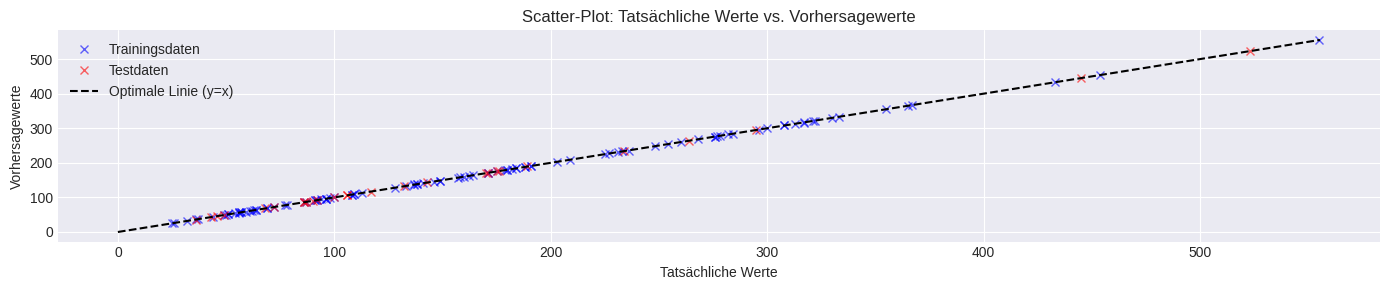

In [82]:
# Scatterplot
# ==============================================================================

plt.figure(figsize=(14, 3))
plt.plot(y_train, predictions_train, 'x', color='blue', alpha=0.6, label='Trainingsdaten')
plt.plot(y_test, predictions_test, 'x', color='red', alpha=0.6, label='Testdaten')

max_value = max(max(y_train), max(y_test), max(predictions_train), max(predictions_test))
plt.plot([0, max_value], [0, max_value], color='black', linestyle='--', label='Optimale Linie (y=x)')

plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagewerte')
plt.title('Scatter-Plot: Tatsächliche Werte vs. Vorhersagewerte')
plt.legend()

plt.tight_layout()
plt.show()


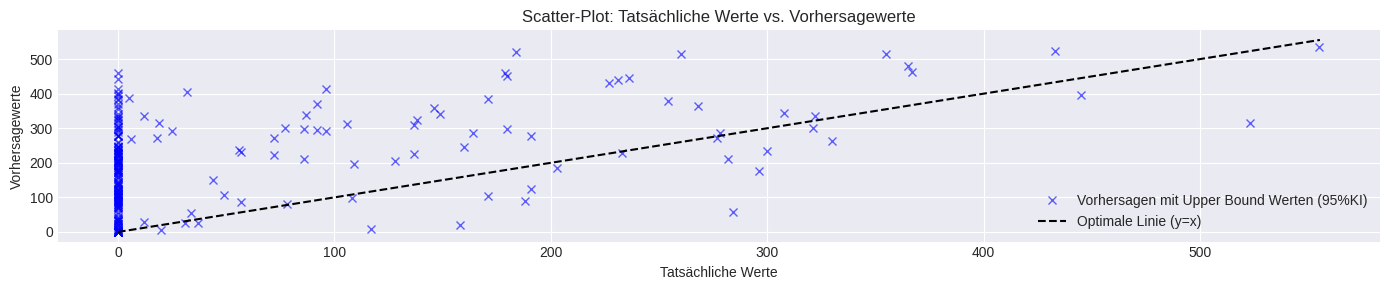

In [83]:
# Vorhersagen mit den Upper-Bounds von calls und n_sick
# ==============================================================================
X_up = df_up[['calls', 'n_sick']]
y = df_up['sby_need_true']

predictions_up = model.predict(X_up)
predictions_up = np.maximum(predictions_up, 0)


# Scatterplot
# ==============================================================================

plt.figure(figsize=(14, 3))
plt.plot(y, predictions_up, 'x', color='blue', alpha=0.6,
         label='Vorhersagen mit Upper Bound Werten (95%KI)')


max_value = max(max(y_train), max(y_test), max(predictions_train),
                max(predictions_test))
plt.plot([0, max_value], [0, max_value], color='black',
         linestyle='--', label='Optimale Linie (y=x)')

plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagewerte')
plt.title('Scatter-Plot: Tatsächliche Werte vs. Vorhersagewerte')
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


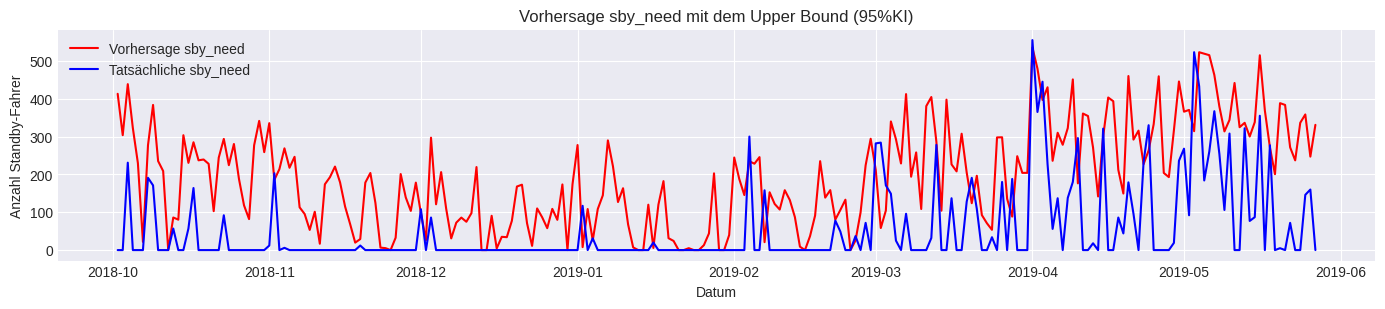

In [84]:
# Vorhersage von sby_need ohne Transformation
# ==============================================================================

plt.figure(figsize=(17,3))
plt.plot(df_up['calls'].index, predictions_up, label = 'Vorhersage sby_need ', color = 'red')
plt.plot(df_up['calls'].index, df_up['sby_need_true'], label = 'Tatsächliche sby_need', color = 'blue')
plt.xlabel('Datum')
plt.ylabel('Anzahl Standby-Fahrer')
plt.title('Vorhersage sby_need mit dem Upper Bound (95%KI)')
plt.legend()
plt.show()



# **3.5 Evaluation**

- Vorhersagen calls und n_sick und warum LGBM mit Upper Bound besser ist.
- Unterschätzung vorher vs. Unterschätzung mit LGBM

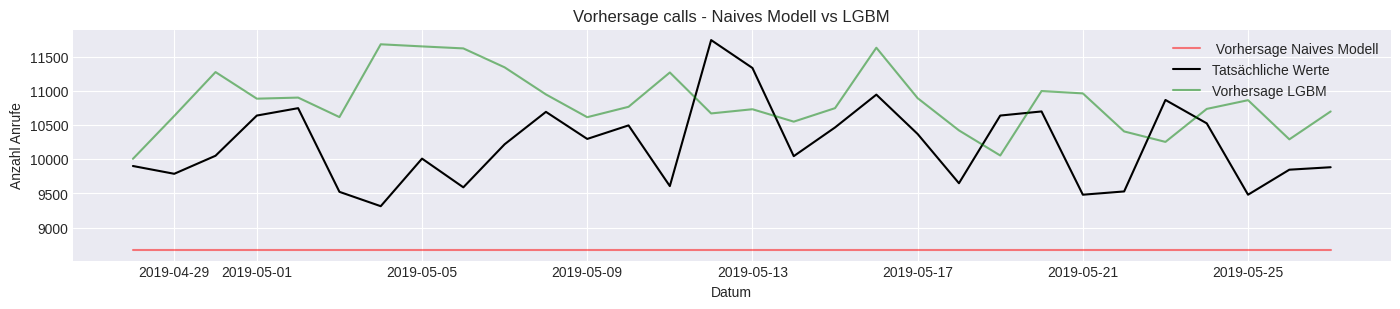

In [85]:
# Optimistische Vorhersage calls vs. Naives Modell
# ==============================================================================
plt.figure(figsize=(17,3))
plt.plot(forecast_df['Vorhersage'], label = ' Vorhersage Naives Modell',
         color= 'red', alpha = 0.5)

plt.plot(forecast_df.index,
         df['calls'].values[-len(forecast_df):], label = 'Tatsächliche Werte'
         , color = 'black')

plt.plot(forecast_df.index,
         df_up['calls'].iloc[-len(forecast_df):],
         label = 'Vorhersage LGBM', color = 'green', alpha = 0.5)

plt.xlabel('Datum')
plt.ylabel('Anzahl Anrufe')
plt.title('Vorhersage calls - Naives Modell vs LGBM')
plt.legend()
plt.show()

Fazit: Es ist ersichtlich, dass das LGBM eher überschätzt und sich besser dem tatsächlichen Wert anpasst, während das Naive Modell konstante Vorhersagen macht.

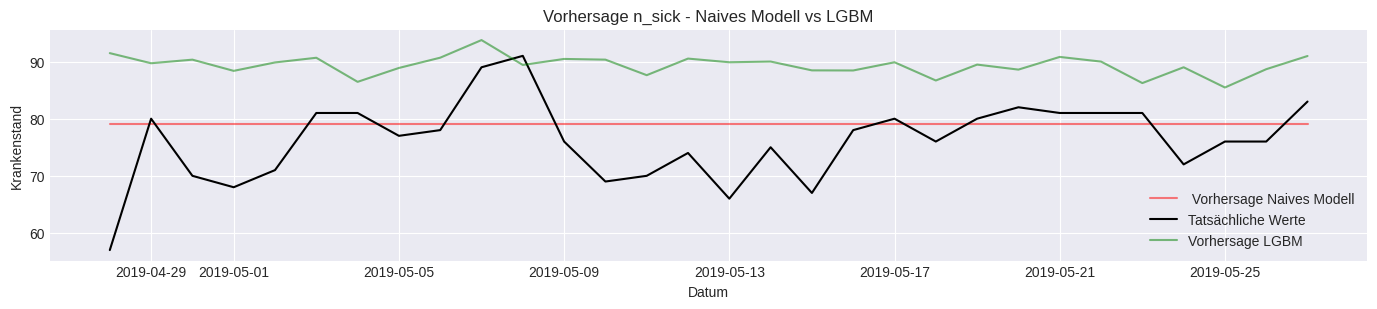

In [86]:
# Optimistische Vorhersage n_sick vs. Naives Modell
# ==============================================================================
plt.figure(figsize=(17,3))
plt.plot(forecast_df_n_sick['Vorhersage'], label = ' Vorhersage Naives Modell',
         color= 'red', alpha = 0.5)
plt.plot(forecast_df_n_sick.index,
         df['n_sick'].values[-len(forecast_df_n_sick):], label = 'Tatsächliche Werte'
         , color = 'black')
plt.plot(forecast_df_n_sick.index,
         df_up['n_sick'].iloc[-len(forecast_df_n_sick):],
         label = 'Vorhersage LGBM', color = 'green', alpha = 0.5)
plt.xlabel('Datum')
plt.ylabel('Krankenstand')
plt.title('Vorhersage n_sick - Naives Modell vs LGBM')
plt.legend()
plt.show()

Fazit: Auch hier werden die Werte vom LGBM überschätzt und es passt sich besser dem tatsächlichen Verlauf der Werte an.

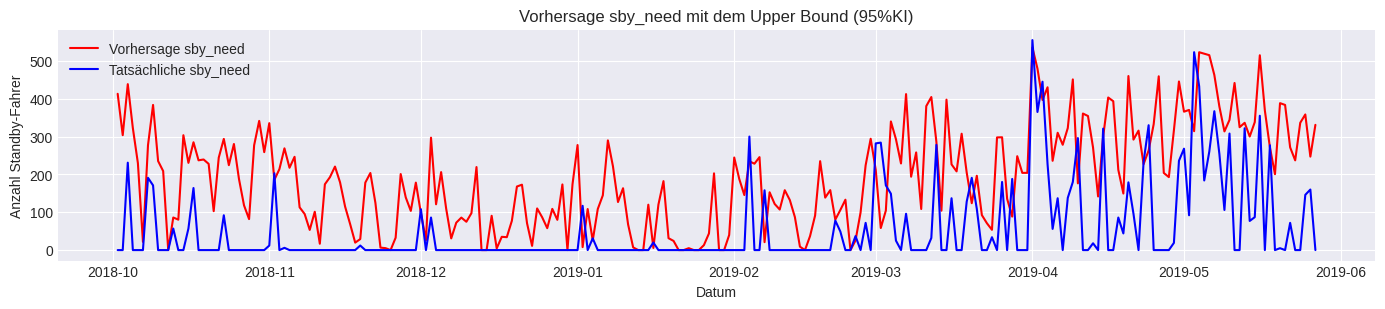

Prozentsatz der unterschätzten Werte: 8.82%


In [87]:
# Vorhersage ohne Transformation
# ==============================================================================

plt.figure(figsize=(17,3))
plt.plot(df_up['calls'].index, predictions_up, label = 'Vorhersage sby_need ', color = 'red')
plt.plot(df_up['calls'].index, df_up['sby_need_true'], label = 'Tatsächliche sby_need', color = 'blue')
plt.xlabel('Datum')
plt.ylabel('Anzahl Standby-Fahrer')
plt.title('Vorhersage sby_need mit dem Upper Bound (95%KI)')
plt.legend()
plt.show()

# Berechnung der Unterschätzung
# ==============================================================================
true_values = df_up['sby_need_true'].values
differences = predictions_up-true_values
underestimated_count = np.sum(differences < 0)
total_count = len(true_values)
underestimated_percentage = (underestimated_count / total_count) * 100
print(f"Prozentsatz der unterschätzten Werte: {underestimated_percentage:.2f}%")



                   calls      n_sick  sby_need_true  predictions  \
date                                                               
2018-10-04  11109.393893  116.197944            231   438.523698   
2018-10-05  10518.013745  118.627035              0   322.690110   
2018-10-06  10075.213054  114.330084              0   229.831422   
2018-10-07   9024.187942  116.406146              0    21.721940   
2018-10-08  10305.598843  115.782407            191   277.360250   

            ma_predictions  
date                        
2018-10-04      385.066004  
2018-10-05      354.963546  
2018-10-06      330.348410  
2018-10-07      191.414491  
2018-10-08      176.304537  


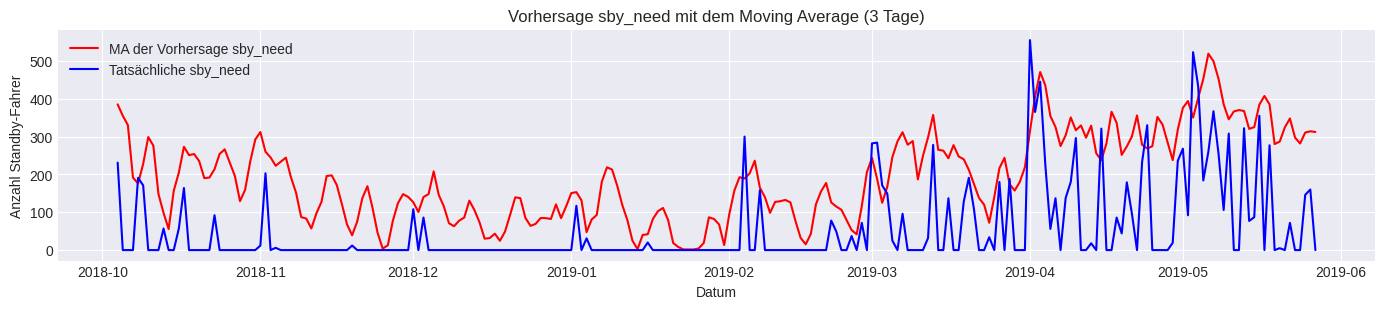

236
236
236
Prozentsatz der unterschätzten Werte: 4.66%


In [88]:
# Transformation der Vorhersage in einen MA3
# ==============================================================================

df_up_ma = df_up.copy()
df_up_ma['predictions'] = predictions_up
df_up_ma['ma_predictions'] = df_up_ma['predictions'].rolling(window=3).mean()
df_up_ma.dropna(inplace=True)
print(df_up_ma.head())

plt.figure(figsize=(17,3))
plt.plot(df_up_ma['calls'].index, df_up_ma['ma_predictions'], label = 'MA der Vorhersage sby_need ', color = 'red')
plt.plot(df_up_ma['calls'].index, df_up_ma['sby_need_true'], label = 'Tatsächliche sby_need', color = 'blue')
plt.xlabel('Datum')
plt.ylabel('Anzahl Standby-Fahrer')
plt.title('Vorhersage sby_need mit dem Moving Average (3 Tage)')
plt.legend()
plt.show()

print(len(df_up_ma))
print(len(df_up_ma['predictions']))
print(len(df_up_ma['ma_predictions']))

# Vorhersage der Unterschätzung
# ==============================================================================
true_values = df_up_ma['sby_need_true'].values
ma_predictions = df_up_ma['ma_predictions'].values
differences = ma_predictions-true_values
underestimated_count = np.sum(differences < 0)
total_count = len(true_values)
underestimated_percentage3 = (underestimated_count / total_count) * 100
print(f"Prozentsatz der unterschätzten Werte: {underestimated_percentage3:.2f}%")


                   calls     n_sick  sby_need_true  predictions  \
date                                                              
2018-11-01  10696.175230  95.771054             12   335.420460   
2018-11-02   9950.330932  94.933950            203   185.423939   
2018-11-03  10106.600292  92.160754              0   213.897047   
2018-11-04  10356.046945  97.260330              6   268.891932   
2018-11-05  10108.469234  95.439605              0   217.555874   

            ma_predictions  
date                        
2018-11-01      234.558420  
2018-11-02      227.217338  
2018-11-03      224.321216  
2018-11-04      218.849223  
2018-11-05      215.457796  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


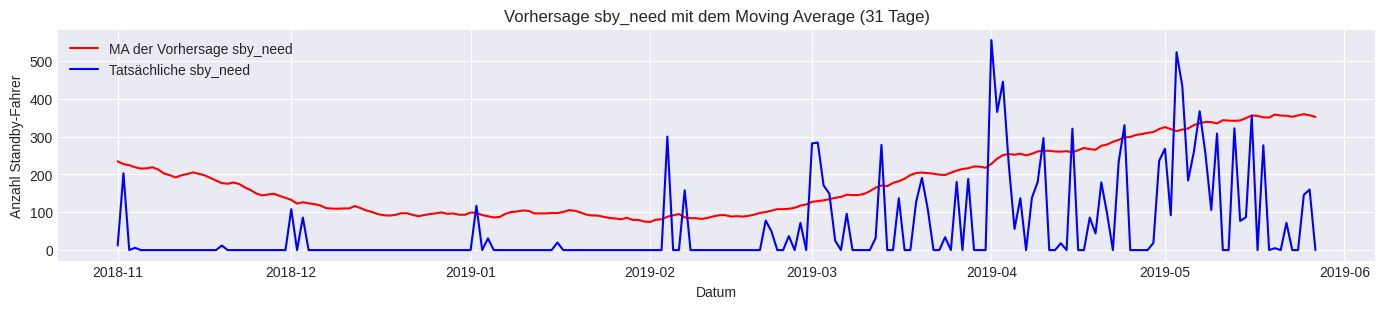

208
208
208
Prozentsatz der unterschätzten Werte: 8.17%


In [89]:
# Transformation der Vorhersage in einen MA31
# ==============================================================================

df_up_ma = df_up.copy()
df_up_ma['predictions'] = predictions_up
df_up_ma['ma_predictions'] = df_up_ma['predictions'].rolling(window=31).mean()
df_up_ma.dropna(inplace=True)
print(df_up_ma.head())

plt.figure(figsize=(17,3))
plt.plot(df_up_ma['calls'].index, df_up_ma['ma_predictions'], label = 'MA der Vorhersage sby_need ', color = 'red')
plt.plot(df_up_ma['calls'].index, df_up_ma['sby_need_true'], label = 'Tatsächliche sby_need', color = 'blue')
plt.xlabel('Datum')
plt.ylabel('Anzahl Standby-Fahrer')
plt.title('Vorhersage sby_need mit dem Moving Average (31 Tage)')
plt.legend()
plt.show()

print(len(df_up_ma))
print(len(df_up_ma['predictions']))
print(len(df_up_ma['ma_predictions']))

# Vorhersage der Unterschätzung
# ==============================================================================
true_values = df_up_ma['sby_need_true'].values
ma_predictions = df_up_ma['ma_predictions'].values
differences = ma_predictions-true_values
underestimated_count = np.sum(differences < 0)
total_count = len(true_values)
underestimated_percentage2 = (underestimated_count / total_count) * 100
print(f"Prozentsatz der unterschätzten Werte: {underestimated_percentage2:.2f}%")



Fazit: Mit einem MA3 wurden die besten Ergebnisse für die Unterschätzung erreicht (ca. 5%). Mit einem MA von 31 war der Wert bei ca. 8%, aber dafür könnte die Verwendung von einem MA31 besser für die Ressourcenplannung sein, da die Volatilität wesentlich geringer ist.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


            Unnamed: 0  PRCP  SNWD  TMAX  TMIN  n_sick  calls  n_duty  \
date                                                                    
2018-10-01         913     1     0    14     2     100   9456    1900   
2018-10-02         914     1     0    11     3      89   9036    1900   
2018-10-03         915     1     0    14     7      94   8592    1900   
2018-10-04         916     0     0    15     6      93  10188    1900   
2018-10-05         917     0     0    20     9      92   8964    1900   

            sby_need  year  ...  moving_avg_365  day_of_year  sin_year  \
date                        ...                                          
2018-10-01        92  2018  ...            8109          274 -0.999999   
2018-10-02         0  2018  ...            8111          275 -0.999833   
2018-10-03         0  2018  ...            8110          276 -0.999371   
2018-10-04       231  2018  ...            8114          277 -0.998613   
2018-10-05         0  2018  ...            8

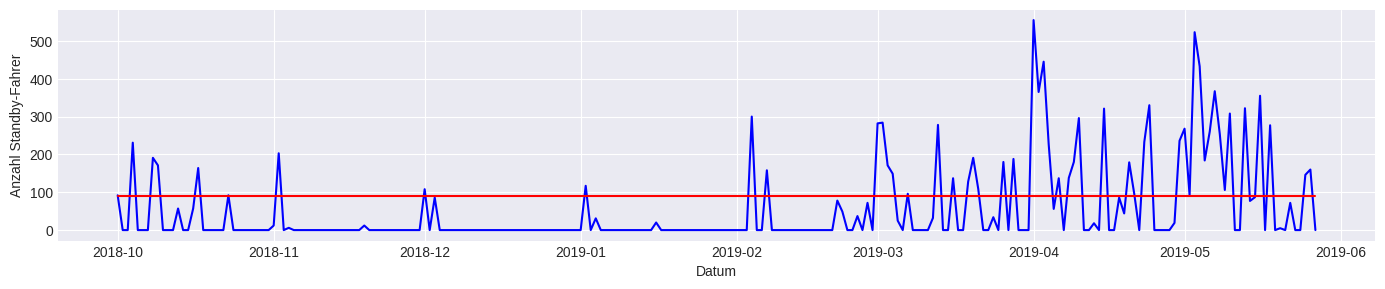

Prozentsatz der unterschätzten Werte: 21.76%


In [90]:
df = pd.read_excel('/content/sample_data/df_features.xlsx')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df = df.asfreq('D')
start_date = '2018-10-01'
df = df.loc[start_date:]

df['n_sby'] = 90
print(df.head())



plt.figure(figsize=(17,3))
plt.plot(df['sby_need'], label = 'Tatsächliche sby_need', color = 'blue')
plt.plot(df['n_sby'], label = 'Eingeplante Ersatzfahrer ohne Modell', color = 'red')

plt.xlabel('Datum')
plt.ylabel('Anzahl Standby-Fahrer')
plt.show()

# Vorhersage der Unterschätzung
# ==============================================================================
true_values = df['sby_need'].values
predictions = df['n_sby'].values
differences = predictions-true_values
underestimated_count = np.sum(differences < 0)
total_count = len(true_values)
underestimated_percentage1 = (underestimated_count / total_count) * 100
print(f"Prozentsatz der unterschätzten Werte: {underestimated_percentage1:.2f}%")

In [91]:
# Vergleich der Werte ohne Modell, mit Modell(MA31) und Modell (MA3)
# ==============================================================================
df_eva = {
    'Modell' : ['Unterschätzung ohne Modell (n_sby)',
                'Unterschätzung mit Modell (MA31)',
                'Unterschätzung mit Modell (MA3)'],
    'Unterschätzung %' : [underestimated_percentage1,
                          underestimated_percentage2,
                          underestimated_percentage3],

}

df_eva = pd.DataFrame(df_eva)
df_eva.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Modell  Unterschätzung %
0  Unterschätzung ohne Modell (n_sby)         21.757322
1    Unterschätzung mit Modell (MA31)          8.173077
2     Unterschätzung mit Modell (MA3)          4.661017

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


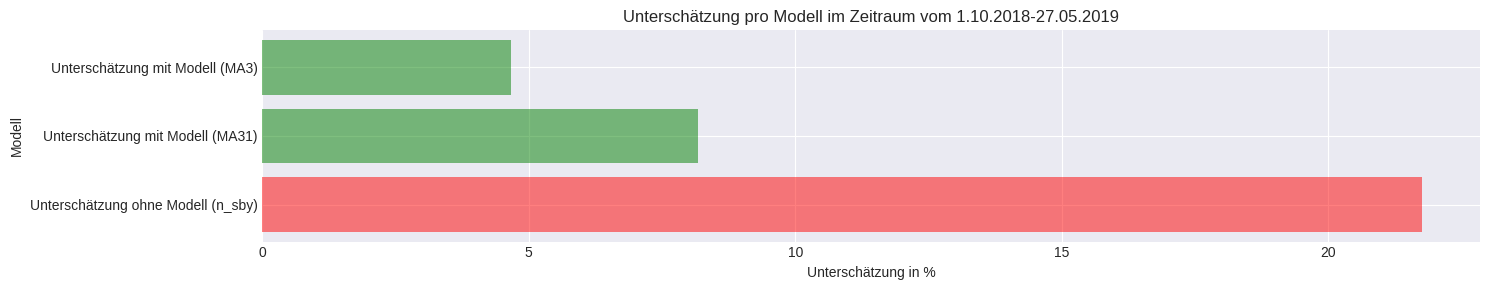

In [92]:
# Balkendiagramm
# ==============================================================================
plt.figure(figsize=(15, 3))
farben = [ 'red', 'green', 'green']
plt.barh(df_eva['Modell'], df_eva['Unterschätzung %'],
         color=farben, alpha = 0.5)
plt.xlabel('Unterschätzung in %')
plt.ylabel('Modell')
plt.title('Unterschätzung pro Modell im Zeitraum vom 1.10.2018-27.05.2019')

plt.tight_layout()
plt.show()



Fazit:
- In den Tagen vom  1.10.2018-27.05.2019 kam es ohne Modell zu hohen Unterschätzungen, da nur 90 Ersatzfahrer konstant eingeplant sind (21,8%).


- In den Tagen vom  1.10.2018-27.05.2019 kam es mit Modell (MA31) zu moderaten Unterschätzungen, da die Ersatzfahrer dynamisch eingeplant sind (8,2%).


- In den Tagen vom  1.10.2018-27.05.2019 kam es mit Modell (MA3) zu wenig Unterschätzungen, da die Ersatzfahrer dynamisch eingeplant sind (4,7%).

- Mit Hilfe des Modells können die Ressourcen besser eingeplant werden und es reduziert die  Einsätze von uneingeplanten Ersatzfahrer um bis zu 17,1%.

- Das Modell kann helfen die Mitarbeiter zu entlasten, indem es hilft die Ressourcen besser zu planen.

- Im Gegenzug werden jedoch mehr Ersatzfahrer eingeplant.

# **4. Modeling_3.Cycle:** (Konzept)

- SKforecast bietet die Option mit einem Konfidenzintervall basierend auf out-of-samples Residuen zu arbeiten. Dadurch wird das Kofidenzintervall breiter. Damit können die Vorhersagen für den Upper Bound noch höher geschätzt werden. Vorteil wäre noch mehr Sicherheit bei der Vorhersage der benötigten Ersatzfahrer, würde aber noch mehr Ressourcen beanspruchen.

- Von der Vorhersage mit dem Upper-Bound könnten weitere MA's berechnet werden, damit die Vorhersagen nicht so verrauscht sind. Das könnte den Planungsprozess weiterhin verbessern.

- Bei SKforecast gibt es verschiedene Arten von Backtesting. Damit könnte das Modell weiter optimiert werden.

- Die Vorhersagen können den Jahreszeiten angepasst werden, um Ressourcen zu sparen. Zum Beispiel die Vorhersage mit MA31 für Zeiten mit wenig Volatilität und MA3 oder ohne Transformation für Zeiten mit hoher Volatilität.